# United States Employment Analysis

#### By Patrick Martin and Rommel Culata 

# Table of Contents <a name="toc"></a>
1. [Introduction](#intro)
2. [Importing Libraries](#libraries)
3. [Importing Data](#importdata)
    1. [May 2021 Total Employment Estimates](#importmain)
    2. [US Labor Force 2021](#importpop)
    3. [National Estimates by Year](#importyear)
4. [Data Cleaning and Organization](#clean)
    1. [May 2021 Total Employment Estimates](#cleanmain)
    2. [US Labor Force 2021](#cleanpop)
    3. [National Estimates by Year](#cleanyear)
5. [Data Visualization](#visual)
    1. [Which industry has the highest and lowest total employment?](#Q1)
    2. [Which state has the highest and lowest total employment (per industry)?](#Q2)
    3. [What is the employment rate for each state?](#Q3)
    4. [Which industry has the highest and lowest median pay?](#Q4)
6. [Exploratory Data Analysis](#explore)
    1. [Is the employment rate normally distributed?](#Q5)
    2. [Is the total employment and labor force correlated?](#Q6)
    3. [Is the annual wage average and total employment correlated?](#Q7)
    4. [Is the wage average changing?](#Q8)
    5. [Could the pandemic have affected the total employment?](#Q9)
7. [Conclusion](#con)

# Introduction <a name="intro"></a>
<b>This is an analysis on the employment in different occupations, sectors, and industries and the labor force in the United States.</b>

<b>The datasets were downloaded from:</b>
- The United States Bureau of Labor Statistics: 
    - https://www.bls.gov/oes/tables.htm (May 2017, May 2018, May 2019, May 2020, May 2021)
    - https://www.bls.gov/web/laus/ststdsadata.txt (May 2017, May 2018, May 2019, May 2020, May 2021)

<b>Disclaimers:</b>
- total employment: total no. of jobs
- datasets are categorized by "total", "major", and "detailed"
  - total: all industries
  - major: selected industry
    - e.g.: Business and Financial Operations Occupations
  - detailed: selected occupation within an industry- e.g.: Project Management Specialists
    - data collection and job classification procedures remain in constant flux, suggesting varied accuracy in some simultaneous comparisons

- datasets were pre-modified to isolate the "total" and "major" categories

  - the US Bureau of Labor Statistics asserts "total" and "major" as the most accurate estimates (May 2017 data follows the 2017 NAICS industry classification)
  
  - processing speed is optimized (originally 37,000+ rows)

- The civilian non-institutional population includes those who are:
  - over 16 years old
  - foreign-country citizens residing in non-embassy, U.S. premises
  - not actively serving in the U.S. Armed Forces
  - not confined to / living in institutions such as:
    - residential care facilities (nursing homes)
    - other correctional institutions
    - detention centers
    - prisons / jails

- the labor force
  - has no cutoff age
  - includes anyone who is:
    - actively looking for work (employed and unemployed)
    - a non-instituional civilian
    - working

<b>Using datasets gathered from the US Bureau of Labor Statistics, we'll will answer the following questions:</b>

1. Which industry has the highest and lowest total employment?
2. Which state has the highest and lowest total employment (per industry)?
3. Which industry has the highest and lowest median pay?
4. What is the employment rate for each state?
5. Is the employment rate normally distributed?
6. Do the labor force and total employment correlate?
7. Do average wage and total employment correlate?
8. Is the wage average changing (per industry)?
9. Could the pandemic have affected the total employment?

[(Top)](#toc)

## Importing Libraries <a name="libraries"></a>

First we need to import the required libraries in order for our code to function properly.

In [1]:
# Essential data-handling libraries
import numpy as np  # handles arrays and scientific computations
import pandas as pd # deploys dataframes for tabular visualization

# For statistical testing
from scipy.stats import pearsonr   # pearson correlation coefficient
from scipy.stats import normaltest # compares against normal distribution
from scipy.stats import f_oneway   # ANOVA
from scipy.stats import norm       # normal distribution
from scipy import stats            # auxiliary statistical operations

# For clean data visualization
import matplotlib.pyplot as plt # base data visualizer
import seaborn as sns           # higher level interface

# For mapping and offline use
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Set default graph style (modifiable)
sns.set()

# Enables Jupyter Notebook to save / display graphs
%matplotlib inline

# Dismiss warnings
import warnings
warnings.filterwarnings('ignore')

[(Top)](#toc)

## Importing Data <a name="importdata"></a>
Datasets to be analyzed are:
<ul>
• Total occupations by industry -- U.S. State estimate (until May 2021)<br>
• Total occupations by industry -- U.S. Labor Force estimate (2017 May to 2021 May)<br>
• Total employment by industry -- U.S. National estimate (2017 May to 2021 May)<br>
</ul>

### May 2021 Total Employment Estimates <a name="importmain"></a>

In [2]:
# Data located in "Edited" sheet of the "2021-State" Excel file
# Load to dataframe "dfBaseMain"
dfBaseMain = pd.read_excel('data/2021-State.xlsx', sheet_name='Edited')

# Verify proper loading
dfBaseMain.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,17.91,28.68,39.79,18630,24720,37250,59660,82760,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,45.51,61.25,87.58,46900,62790,94650,127400,182160,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,...,30.37,44.88,58.84,37930,48550,63170,93340,122390,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,...,38.4,50.95,64.05,43300,60320,79880,105980,133220,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,17-0000,Architecture and Engineering Occupations,...,39.66,58.9,73.94,47040,61490,82500,122510,153800,NaN,NaN


In [3]:
# Summarize dataframe to monitor:
#  - no. of rows / cols.
#  - col. datatypes
#  - NULL or NaN values

dfBaseMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          1242 non-null   int64  
 1   AREA_TITLE    1242 non-null   object 
 2   AREA_TYPE     1242 non-null   int64  
 3   PRIM_STATE    1242 non-null   object 
 4   NAICS         1242 non-null   int64  
 5   NAICS_TITLE   1242 non-null   object 
 6   I_GROUP       1242 non-null   object 
 7   OWN_CODE      1242 non-null   int64  
 8   OCC_CODE      1242 non-null   object 
 9   OCC_TITLE     1242 non-null   object 
 10  O_GROUP       1242 non-null   object 
 11  TOT_EMP       1242 non-null   object 
 12  EMP_PRSE      1242 non-null   object 
 13  JOBS_1000     1242 non-null   object 
 14  LOC_QUOTIENT  1242 non-null   object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        1242 non-null   object 
 18  A_MEAN        1242 non-null 

[(Top)](#toc)

### US Labor Force 2021 <a name="importpop"></a>
These estimates are in different sheets of one file.<br>In spirit of DRY (Don't Repeat Yourself), we created a function to:
<ul>
    - read an excel file<br>
    - locate the searched sheet<br>
    - return the data as a dataframe<br>
</ul>

In [4]:
# parameter name "year" helps identify sheet name
def createDF(year):
    
    #Read the excel file and sheet name and save it to a dataframe
    df = pd.read_excel('data/Labor-Force.xlsx', sheet_name=('May '+ year))
    
    #Return the dataframe
    return df

In [5]:
# create dataframe "dfLF17"
dfLF17 = createDF('2017')

# Verify proper loading
dfLF17.head()

,State and area,Civilian Non-institutional Population 17,LF Total 17,Pop Percent 17,Emp Total 17,Emp Percent 17,Unemp Total 17,Unemp Percent 17
0,Alabama,3885734,2201642,56.7,2100033,54.0,101609,4.6
1,Alaska,546537,361601,66.2,338131,61.9,23470,6.5
2,Arizona,5329287,3235526,60.7,3075187,57.7,160339,5.0
3,Arkansas,2310930,1349569,58.4,1300097,56.3,49472,3.7
4,California,30778619,19193658,62.4,18252450,59.3,941208,4.9


In [6]:
# Summarize data
dfLF17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State and area                            51 non-null     object 
 1   Civilian Non-institutional Population 17  51 non-null     int64  
 2   LF Total 17                               51 non-null     int64  
 3   Pop Percent 17                            51 non-null     float64
 4   Emp Total 17                              51 non-null     int64  
 5   Emp Percent 17                            51 non-null     float64
 6   Unemp Total 17                            51 non-null     int64  
 7   Unemp Percent 17                          51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


In [7]:
# create dataframe "dfLF18"
dfLF18 = createDF('2018')

# Verify proper loading
dfLF18.head()

,State and area,Civilian Non-institutional Population 18,LF Total 18,Pop Percent 18,Emp Total 18,Emp Percent 18,Unemp Total 18,Unemp Percent 18
0,Alabama,3907744,2238465,57.3,2150167,55.0,88298,3.9
1,Alaska,545675,356371,65.3,335170,61.4,21201,5.9
2,Arizona,5420337,3314729,61.2,3160051,58.3,154678,4.7
3,Arkansas,2319552,1350426,58.2,1301908,56.1,48518,3.6
4,California,30944064,19305583,62.4,18491362,59.8,814221,4.2


In [8]:
# Summarize data
dfLF18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State and area                            51 non-null     object 
 1   Civilian Non-institutional Population 18  51 non-null     int64  
 2   LF Total 18                               51 non-null     int64  
 3   Pop Percent 18                            51 non-null     float64
 4   Emp Total 18                              51 non-null     int64  
 5   Emp Percent 18                            51 non-null     float64
 6   Unemp Total 18                            51 non-null     int64  
 7   Unemp Percent 18                          51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


In [9]:
# create dataframe "dfLF19"
dfLF19 = createDF('2019')

# Verify proper loading
dfLF19.head()

,State and area,Civilian Non-institutional Population 19,LF Total 19,Pop Percent 19,Emp Total 19,Emp Percent 19,Unemp Total 19,Unemp Percent 19
0,Alabama,3931489,2269477,57.7,2199812,56.0,69665,3.1
1,Alaska,544832,352970,64.8,333694,61.2,19276,5.5
2,Arizona,5521644,3419960,61.9,3256037,59.0,163923,4.8
3,Arkansas,2328527,1363616,58.6,1317815,56.6,45801,3.4
4,California,31040925,19369999,62.4,18584927,59.9,785072,4.1


In [10]:
# Summarize data
dfLF19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State and area                            51 non-null     object 
 1   Civilian Non-institutional Population 19  51 non-null     int64  
 2   LF Total 19                               51 non-null     int64  
 3   Pop Percent 19                            51 non-null     float64
 4   Emp Total 19                              51 non-null     int64  
 5   Emp Percent 19                            51 non-null     float64
 6   Unemp Total 19                            51 non-null     int64  
 7   Unemp Percent 19                          51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


In [11]:
# create dataframe "dfLF20"
dfLF20 = createDF('2020')

# verify proper loading
dfLF20.head()

,State and area,Civilian Non-institutional Population 20,LF Total 20,Pop Percent 20,Emp Total 20,Emp Percent 20,Unemp Total 20,Unemp Percent 20
0,Alabama,3955311,2270749,57.4,2035223,51.5,235526,10.4
1,Alaska,544176,345436,63.5,304260,55.9,41176,11.9
2,Arizona,5637075,3432853,60.9,3053663,54.2,379190,11.0
3,Arkansas,2340206,1365465,58.3,1246160,53.3,119305,8.7
4,California,31101373,18606506,59.8,15604432,50.2,3002074,16.1


In [12]:
# Summarize data
dfLF20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State and area                            51 non-null     object 
 1   Civilian Non-institutional Population 20  51 non-null     int64  
 2   LF Total 20                               51 non-null     int64  
 3   Pop Percent 20                            51 non-null     float64
 4   Emp Total 20                              51 non-null     int64  
 5   Emp Percent 20                            51 non-null     float64
 6   Unemp Total 20                            51 non-null     int64  
 7   Unemp Percent 20                          51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


In [13]:
# create dataframe for 2021 data
dfLF21 = createDF('2021')

# verify proper loading
dfLF21.head()

,State and area,Civilian Non-institutional Population 21,LF Total 21,Pop Percent 21,Emp Total 21,Emp Percent 21,Unemp Total 21,Unemp Percent 21
0,Alabama,3970436,2249901,56.7,2169710,54.6,80191,3.6
1,Alaska,545149,353153,64.8,329080,60.4,24073,6.8
2,Arizona,5742205,3519581,61.3,3329319,58.0,190262,5.4
3,Arkansas,2354084,1332758,56.6,1274656,54.1,58102,4.4
4,California,31011360,18913379,61.0,17414749,56.2,1498630,7.9


In [14]:
# Summarize data
dfLF21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State and area                            51 non-null     object 
 1   Civilian Non-institutional Population 21  51 non-null     int64  
 2   LF Total 21                               51 non-null     int64  
 3   Pop Percent 21                            51 non-null     float64
 4   Emp Total 21                              51 non-null     int64  
 5   Emp Percent 21                            51 non-null     float64
 6   Unemp Total 21                            51 non-null     int64  
 7   Unemp Percent 21                          51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


[(Top)](#toc)

### National Estimates by Year <a name="importyear"></a>
The national occupation estimates are located in the same excel file on different sheets just like the labor force datasets. Once again, to save time, we have created a function that will read the excel file, locate the appropriate sheet, and save it to the corresponding dataframe.

In [15]:
# inputs "year" (sheet name)
# outputs dataframe from National.xlsx

def createDF2(year):
    df = pd.read_excel('data/National.xlsx', sheet_name=year)
    return df

In [16]:
# create dataframe for 2017 data
dfBase17 = createDF2('2017')

# verify proper loading
dfBase17.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,142549250,0.1,24.34,50620,0.1,9.60,11.91,18.12,29.38,46.23,19970,24770,37690,61110,96150,NaN,NaN
1,11-0000,Management Occupations,major,7280330,0.2,57.65,119910,0.1,23.19,33.60,49.32,71.83,#,48220,69880,102590,149410,#,NaN,NaN
2,13-0000,Business and Financial Operations Occupations,major,7472750,0.2,36.70,76330,0.2,18.12,24.25,32.55,44.22,59.13,37690,50450,67710,91970,123000,NaN,NaN
3,15-0000,Computer and Mathematical Occupations,major,4261460,0.5,43.18,89810,0.4,20.95,29.02,40.66,54.87,69.63,43580,60360,84560,114130,144830,NaN,NaN
4,17-0000,Architecture and Engineering Occupations,major,2516780,0.6,41.44,86190,0.3,20.87,28.21,38.07,51.06,65.93,43420,58690,79180,106200,137130,NaN,NaN


In [17]:
# summarize data
dfBase17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OCC_CODE   23 non-null     object 
 1   OCC_TITLE  23 non-null     object 
 2   OCC_GROUP  23 non-null     object 
 3   TOT_EMP    23 non-null     int64  
 4   EMP_PRSE   23 non-null     float64
 5   H_MEAN     23 non-null     float64
 6   A_MEAN     23 non-null     int64  
 7   MEAN_PRSE  23 non-null     float64
 8   H_PCT10    23 non-null     float64
 9   H_PCT25    23 non-null     float64
 10  H_MEDIAN   23 non-null     float64
 11  H_PCT75    23 non-null     float64
 12  H_PCT90    23 non-null     object 
 13  A_PCT10    23 non-null     int64  
 14  A_PCT25    23 non-null     int64  
 15  A_MEDIAN   23 non-null     int64  
 16  A_PCT75    23 non-null     int64  
 17  A_PCT90    23 non-null     object 
 18  ANNUAL     0 non-null      float64
 19  HOURLY     0 non-null      float64
dtypes: float64(9

In [18]:
# create dataframe for 2018 data
dfBase18 = createDF2('2018')

# verify proper loading
dfBase18.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,144733270,0.1,24.98,51960,0.1,9.95,12.37,18.58,30.06,47.31,20690,25740,38640,62510,98410,NaN,NaN
1,11-0000,Management Occupations,major,7616650,0.2,58.44,121560,0.1,23.68,34.08,50.11,72.93,#,49260,70880,104240,151700,#,NaN,NaN
2,13-0000,Business and Financial Operations Occupations,major,7721300,0.3,36.98,76910,0.2,18.33,24.53,32.86,44.65,59.44,38130,51020,68350,92870,123640,NaN,NaN
3,15-0000,Computer and Mathematical Occupations,major,4384300,0.5,44.01,91530,0.4,21.41,29.64,41.51,55.98,71.12,44530,61640,86340,116440,147920,NaN,NaN
4,17-0000,Architecture and Engineering Occupations,major,2556220,0.5,42.01,87370,0.3,21.33,28.72,38.55,51.81,66.98,44360,59750,80170,107760,139320,NaN,NaN


In [19]:
# summarize data
dfBase18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OCC_CODE   23 non-null     object 
 1   OCC_TITLE  23 non-null     object 
 2   OCC_GROUP  23 non-null     object 
 3   TOT_EMP    23 non-null     int64  
 4   EMP_PRSE   23 non-null     float64
 5   H_MEAN     23 non-null     float64
 6   A_MEAN     23 non-null     int64  
 7   MEAN_PRSE  23 non-null     float64
 8   H_PCT10    23 non-null     float64
 9   H_PCT25    23 non-null     float64
 10  H_MEDIAN   23 non-null     float64
 11  H_PCT75    23 non-null     float64
 12  H_PCT90    23 non-null     object 
 13  A_PCT10    23 non-null     int64  
 14  A_PCT25    23 non-null     int64  
 15  A_MEDIAN   23 non-null     int64  
 16  A_PCT75    23 non-null     int64  
 17  A_PCT90    23 non-null     object 
 18  ANNUAL     0 non-null      float64
 19  HOURLY     0 non-null      float64
dtypes: float64(9

In [20]:
# create dataframe for 2019 data
dfBase19 = createDF2('2019')

# setting column names uppercase for later data cleaning
dfBase19.columns = dfBase19.columns.str.upper()

# verify proper loading
dfBase19.head()

,AREA,AREA_TITLE,AREA_TYPE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,19.14,30.88,48.57,21530,27080,39810,64240,101020,NaN,NaN
1,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,...,50.80,74.16,#,49990,71460,105660,154260,#,NaN,NaN
2,99,U.S.,1,0,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,major,...,33.57,45.61,60.6,39020,52130,69820,94870,126040,NaN,NaN
3,99,U.S.,1,0,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,major,...,42.47,57.47,73.08,45320,62850,88340,119550,152010,NaN,NaN
4,99,U.S.,1,0,Cross-industry,cross-industry,1235,17-0000,Architecture and Engineering Occupations,major,...,39.15,52.87,68.56,45280,60910,81440,109970,142610,NaN,NaN


In [21]:
# summarize data
dfBase19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          23 non-null     int64  
 1   AREA_TITLE    23 non-null     object 
 2   AREA_TYPE     23 non-null     int64  
 3   NAICS         23 non-null     int64  
 4   NAICS_TITLE   23 non-null     object 
 5   I_GROUP       23 non-null     object 
 6   OWN_CODE      23 non-null     int64  
 7   OCC_CODE      23 non-null     object 
 8   OCC_TITLE     23 non-null     object 
 9   O_GROUP       23 non-null     object 
 10  TOT_EMP       23 non-null     int64  
 11  EMP_PRSE      23 non-null     float64
 12  JOBS_1000     0 non-null      float64
 13  LOC_QUOTIENT  0 non-null      float64
 14  PCT_TOTAL     0 non-null      float64
 15  H_MEAN        23 non-null     float64
 16  A_MEAN        23 non-null     int64  
 17  MEAN_PRSE     23 non-null     float64
 18  H_PCT10       23 non-null     fl

In [22]:
# create dataframe for 2020 data
dfBase20 = createDF2('2020')

# verify proper loading
dfBase20.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,20.17,32.41,50.99,22810,29020,41950,67410,106050,NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,52.77,76.71,#,51670,74250,109760,159550,#,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,...,34.73,47.31,62.68,40310,53550,72250,98390,130380,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,...,43.92,59.44,75.54,46400,64730,91350,123640,157120,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,17-0000,Architecture and Engineering Occupations,...,39.98,53.83,69.27,46190,62120,83160,111960,144090,NaN,NaN


In [23]:
# summarize data
dfBase20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          23 non-null     int64  
 1   AREA_TITLE    23 non-null     object 
 2   AREA_TYPE     23 non-null     int64  
 3   PRIM_STATE    23 non-null     object 
 4   NAICS         23 non-null     int64  
 5   NAICS_TITLE   23 non-null     object 
 6   I_GROUP       23 non-null     object 
 7   OWN_CODE      23 non-null     int64  
 8   OCC_CODE      23 non-null     object 
 9   OCC_TITLE     23 non-null     object 
 10  O_GROUP       23 non-null     object 
 11  TOT_EMP       23 non-null     int64  
 12  EMP_PRSE      23 non-null     float64
 13  JOBS_1000     0 non-null      float64
 14  LOC_QUOTIENT  0 non-null      float64
 15  PCT_TOTAL     0 non-null      float64
 16  H_MEAN        23 non-null     float64
 17  A_MEAN        23 non-null     int64  
 18  MEAN_PRSE     23 non-null     fl

In [24]:
# create dataframe for 2021 data
dfBase21 = createDF2('2021')

# verify proper loading
dfBase21.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,22.00,32.98,49.43,23980,29950,45760,68590,102810,NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,49.25,77.39,#,47860,74710,102450,160960,#,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,...,36.81,48.19,62.8,39060,53410,76570,100220,130620,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,...,46.90,61.55,78.67,47430,62590,97540,128030,163640,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,17-0000,Architecture and Engineering Occupations,...,38.39,54.11,71.37,47490,61470,79840,112550,148460,NaN,NaN


In [25]:
# summarize data
dfBase21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          23 non-null     int64  
 1   AREA_TITLE    23 non-null     object 
 2   AREA_TYPE     23 non-null     int64  
 3   PRIM_STATE    23 non-null     object 
 4   NAICS         23 non-null     int64  
 5   NAICS_TITLE   23 non-null     object 
 6   I_GROUP       23 non-null     object 
 7   OWN_CODE      23 non-null     int64  
 8   OCC_CODE      23 non-null     object 
 9   OCC_TITLE     23 non-null     object 
 10  O_GROUP       23 non-null     object 
 11  TOT_EMP       23 non-null     int64  
 12  EMP_PRSE      23 non-null     float64
 13  JOBS_1000     0 non-null      float64
 14  LOC_QUOTIENT  0 non-null      float64
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        23 non-null     float64
 18  A_MEAN        23 non-null     in

[(Top)](#toc)

## Data Cleaning and Organization <a name="clean"></a>
We'll clean and organize our data by:
<ul>
    - removing unwanted columns and rows<br>
    - renaming column for readability and clarity<br>
    - changing column datatypes for consistency

### May 2021 State Occupation Estimates <a name="cleanmain"></a>

In [26]:
#Create a new dataframe and will contain only the desired data.
#We will keep the location name, location abbreviation, occupation title, 
#total employment numbers, and the mean and median of the hourly
#and annual wages. 
#The new dataframe will be called dfMain
dfMain = dfBaseMain[['AREA_TITLE', 'PRIM_STATE', 'OCC_TITLE',
                     'TOT_EMP', 'H_MEAN', 'A_MEAN']]

#Display the head of the new dataframe to ensure it was saved properly
dfMain.head()

,AREA_TITLE,PRIM_STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN
0,Alabama,AL,All Occupations,1928110,23.13,48110
1,Alabama,AL,Management Occupations,96070,51.06,106210
2,Alabama,AL,Business and Financial Operations Occupations,89400,35.92,74720
3,Alabama,AL,Computer and Mathematical Occupations,46460,42.55,88510
4,Alabama,AL,Architecture and Engineering Occupations,46060,44.88,93350


#### The column names are really confusing, so we will rename them to something that is easier to understand.

In [27]:
# declare dictionary with keys as old and values as new column names
renameCols = {'AREA_TITLE':'State', 'PRIM_STATE':'State Abbrv',
              'OCC_TITLE':'Industry', 'TOT_EMP':'Total Employment',
              'H_MEAN':'Hourly Wage Mean', 'A_MEAN':'Annual Wage Mean'}

# renaming allows for easier understanding
dfMain.rename(columns=renameCols, inplace=True)

# verify proper changes
dfMain.head()

,State,State Abbrv,Industry,Total Employment,Hourly Wage Mean,Annual Wage Mean
0,Alabama,AL,All Occupations,1928110,23.13,48110
1,Alabama,AL,Management Occupations,96070,51.06,106210
2,Alabama,AL,Business and Financial Operations Occupations,89400,35.92,74720
3,Alabama,AL,Computer and Mathematical Occupations,46460,42.55,88510
4,Alabama,AL,Architecture and Engineering Occupations,46060,44.88,93350


#### The tailing "Occupations" creates redundancy in the Industry column. For concision, we will remove this by renaming all columns.

In [28]:
# declare dictionary with keys as old and values as new column names
renameVals = {'All Occupations':'All',
              'Architecture and Engineering Occupations':'Architecture and Engineering',
              'Arts, Design, Entertainment, Sports, and Media Occupations':'Arts, Design, Entertainment, Sports, and Media',
              'Building and Grounds Cleaning and Maintenance Occupations':'Building and Grounds Cleaning and Maintenance',
              'Business and Financial Operations Occupations':'Business and Financial Operations',
              'Community and Social Service Occupations':'Community and Social Service',
              'Computer and Mathematical Occupations':'Computer and Mathematical',
              'Construction and Extraction Occupations':'Construction and Extraction',
              'Educational Instruction and Library Occupations':'Educational Instruction and Library',
              'Farming, Fishing, and Forestry Occupations':'Farming, Fishing, and Forestry',
              'Food Preparation and Serving Related Occupations':'Food Preparation and Serving Related',
              'Healthcare Practitioners and Technical Occupations':'Healthcare Practitioners and Technical',
              'Healthcare Support Occupations':'Healthcare Support',
              'Installation, Maintenance, and Repair Occupations':'Installation, Maintenance, and Repair',
              'Legal Occupations':'Legal',
              'Life, Physical, and Social Science Occupations':'Life, Physical, and Social Science',
              'Management Occupations':'Management',
              'Office and Administrative Support Occupations':'Office and Administrative Support',
              'Personal Care and Service Occupations':'Personal Care and Service',
              'Production Occupations':'Production',
              'Protective Service Occupations':'Protective Service',
              'Sales and Related Occupations':'Sales and Related',
              'Transportation and Material Moving Occupations':'Transportation and Material Moving'}

# rename old columns with dictionary values
dfMain.replace({'Industry':renameVals}, inplace=True)

# verify proper changes
dfMain.head()

,State,State Abbrv,Industry,Total Employment,Hourly Wage Mean,Annual Wage Mean
0,Alabama,AL,All,1928110,23.13,48110
1,Alabama,AL,Management,96070,51.06,106210
2,Alabama,AL,Business and Financial Operations,89400,35.92,74720
3,Alabama,AL,Computer and Mathematical,46460,42.55,88510
4,Alabama,AL,Architecture and Engineering,46060,44.88,93350


#### Our focus is the 50 states and D.C. We will probe for any US territories in the dataset.

In [29]:
# display "State" unique values
dfMain['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

#### We will remove Guam, Puerto Rico, and the Virgin Islands values.

In [30]:
# drop unwanted rows
dfMain = dfMain.drop(dfMain[(dfMain.State == 'Guam') |
                            (dfMain.State == 'Puerto Rico') |
                            (dfMain.State == 'Virgin Islands')].index)

# verify changes
dfMain['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [31]:
# display datatypes
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             1173 non-null   object
 1   State Abbrv       1173 non-null   object
 2   Industry          1173 non-null   object
 3   Total Employment  1173 non-null   object
 4   Hourly Wage Mean  1173 non-null   object
 5   Annual Wage Mean  1173 non-null   object
dtypes: object(6)
memory usage: 55.1+ KB


#### We can see that Total Employment, Hourly Wage Mean, Annual Wage Mean, Hourly Wage Median, and Annual Wage Median are all objects. They need to be numeric datatypes if we are going to perform any analysis with them.

In [32]:
# use to_numeric() conversion for:
#  - Total Employment
#  - Hourly Wage Mean
#  - Annual Wage Mean
# setting errors='coerce' ensures conversion of:
#  - columns
#  - non-numeric values --> NaN

dfMain['Total Employment'] = pd.to_numeric(dfMain['Total Employment'], errors='coerce')
dfMain['Hourly Wage Mean'] = pd.to_numeric(dfMain['Hourly Wage Mean'], errors='coerce')
dfMain['Annual Wage Mean'] = pd.to_numeric(dfMain['Annual Wage Mean'], errors='coerce')

# verify changes
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             1173 non-null   object 
 1   State Abbrv       1173 non-null   object 
 2   Industry          1173 non-null   object 
 3   Total Employment  1172 non-null   float64
 4   Hourly Wage Mean  1172 non-null   float64
 5   Annual Wage Mean  1172 non-null   float64
dtypes: float64(3), object(3)
memory usage: 55.1+ KB


#### We can see that there some NaN values in the dataframe. We will replace their values with 0 since the NaN values were asterisks that represented missing data, according to the original file.

In [33]:
# fillna replaces NaN values with 0
dfMain.fillna(0, inplace=True)

# verify changes
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             1173 non-null   object 
 1   State Abbrv       1173 non-null   object 
 2   Industry          1173 non-null   object 
 3   Total Employment  1173 non-null   float64
 4   Hourly Wage Mean  1173 non-null   float64
 5   Annual Wage Mean  1173 non-null   float64
dtypes: float64(3), object(3)
memory usage: 55.1+ KB


[(Top)](#toc)

### US Labor Force 2021 <a name="cleanpop"></a>

#### This function renames dataframe columns. <br>A key parameter is "year", reflecting our dataframes' unique identifiers.

In [34]:
def renameDF(data, year, end):
    
    # input old dataframe
    df = data
    
    # dict key:value = old:new names
    renameCols = {'State and area':'State',
              'Civilian Non-institutional Population '+end: 'CNI Population '+year,
              'LF Total '+end:'Labor Force '+year,
              'Pop Percent '+end:'Participation Rate '+year,
              'Emp Total '+end:'Employment Total '+year,
              'Emp Percent '+end:'Employment Rate '+year,
              'Unemp Total '+end:'Unemployment Total '+year,
              'Unemp Percent '+end:'Unemployment Rate '+year}

    # rename with dict for easier comprehension
    df.rename(columns=renameCols, inplace=True)
    
    # output renamed dataframe
    return df

In [35]:
# rename dataframe columns in Labor Force 2017 data
dfLF17 = renameDF(dfLF17, '2017', '17')

# verify changes
dfLF17.head()

,State,CNI Population 2017,Labor Force 2017,Participation Rate 2017,Employment Total 2017,Employment Rate 2017,Unemployment Total 2017,Unemployment Rate 2017
0,Alabama,3885734,2201642,56.7,2100033,54.0,101609,4.6
1,Alaska,546537,361601,66.2,338131,61.9,23470,6.5
2,Arizona,5329287,3235526,60.7,3075187,57.7,160339,5.0
3,Arkansas,2310930,1349569,58.4,1300097,56.3,49472,3.7
4,California,30778619,19193658,62.4,18252450,59.3,941208,4.9


In [36]:
# rename dataframe columns in Labor Force 2018 data
dfLF18 = renameDF(dfLF18, '2018', '18')

# verify changes
dfLF18.head()

,State,CNI Population 2018,Labor Force 2018,Participation Rate 2018,Employment Total 2018,Employment Rate 2018,Unemployment Total 2018,Unemployment Rate 2018
0,Alabama,3907744,2238465,57.3,2150167,55.0,88298,3.9
1,Alaska,545675,356371,65.3,335170,61.4,21201,5.9
2,Arizona,5420337,3314729,61.2,3160051,58.3,154678,4.7
3,Arkansas,2319552,1350426,58.2,1301908,56.1,48518,3.6
4,California,30944064,19305583,62.4,18491362,59.8,814221,4.2


In [37]:
# rename dataframe columns in Labor Force 2019 data
dfLF19 = renameDF(dfLF19, '2019', '19')

# verify changes
dfLF19.head()

,State,CNI Population 2019,Labor Force 2019,Participation Rate 2019,Employment Total 2019,Employment Rate 2019,Unemployment Total 2019,Unemployment Rate 2019
0,Alabama,3931489,2269477,57.7,2199812,56.0,69665,3.1
1,Alaska,544832,352970,64.8,333694,61.2,19276,5.5
2,Arizona,5521644,3419960,61.9,3256037,59.0,163923,4.8
3,Arkansas,2328527,1363616,58.6,1317815,56.6,45801,3.4
4,California,31040925,19369999,62.4,18584927,59.9,785072,4.1


In [38]:
# rename dataframe columns in Labor Force 2020 data
dfLF20 = renameDF(dfLF20, '2020', '20')

# verify changes
dfLF20.head()

,State,CNI Population 2020,Labor Force 2020,Participation Rate 2020,Employment Total 2020,Employment Rate 2020,Unemployment Total 2020,Unemployment Rate 2020
0,Alabama,3955311,2270749,57.4,2035223,51.5,235526,10.4
1,Alaska,544176,345436,63.5,304260,55.9,41176,11.9
2,Arizona,5637075,3432853,60.9,3053663,54.2,379190,11.0
3,Arkansas,2340206,1365465,58.3,1246160,53.3,119305,8.7
4,California,31101373,18606506,59.8,15604432,50.2,3002074,16.1


In [39]:
# rename dataframe columns in Labor Force 2021 data
dfLF21 = renameDF(dfLF21, '2021', '21')

# verify changes
dfLF21.head()

,State,CNI Population 2021,Labor Force 2021,Participation Rate 2021,Employment Total 2021,Employment Rate 2021,Unemployment Total 2021,Unemployment Rate 2021
0,Alabama,3970436,2249901,56.7,2169710,54.6,80191,3.6
1,Alaska,545149,353153,64.8,329080,60.4,24073,6.8
2,Arizona,5742205,3519581,61.3,3329319,58.0,190262,5.4
3,Arkansas,2354084,1332758,56.6,1274656,54.1,58102,4.4
4,California,31011360,18913379,61.0,17414749,56.2,1498630,7.9


In [40]:
# initiate mega-set for all five years using merge()
# start with first 2 years
dfLabor = pd.merge(left=dfLF17, right=dfLF18, how='left',
                   left_on='State', right_on='State')

# verify merge before continuing
dfLabor.head()

,State,CNI Population 2017,Labor Force 2017,Participation Rate 2017,Employment Total 2017,Employment Rate 2017,Unemployment Total 2017,Unemployment Rate 2017,CNI Population 2018,Labor Force 2018,Participation Rate 2018,Employment Total 2018,Employment Rate 2018,Unemployment Total 2018,Unemployment Rate 2018
0,Alabama,3885734,2201642,56.7,2100033,54.0,101609,4.6,3907744,2238465,57.3,2150167,55.0,88298,3.9
1,Alaska,546537,361601,66.2,338131,61.9,23470,6.5,545675,356371,65.3,335170,61.4,21201,5.9
2,Arizona,5329287,3235526,60.7,3075187,57.7,160339,5.0,5420337,3314729,61.2,3160051,58.3,154678,4.7
3,Arkansas,2310930,1349569,58.4,1300097,56.3,49472,3.7,2319552,1350426,58.2,1301908,56.1,48518,3.6
4,California,30778619,19193658,62.4,18252450,59.3,941208,4.9,30944064,19305583,62.4,18491362,59.8,814221,4.2


In [41]:
# merge remainders to consolidate all 5 years
dfLabor = pd.merge(left=dfLabor, right=dfLF19, how='left',
                   left_on='State', right_on='State')

dfLabor = pd.merge(left=dfLabor, right=dfLF20, how='left',
                   left_on='State', right_on='State')

dfLabor = pd.merge(left=dfLabor, right=dfLF21, how='left',
                   left_on='State', right_on='State')

# verify for
#    merge
#    NULL / NaN handling
dfLabor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    51 non-null     object 
 1   CNI Population 2017      51 non-null     int64  
 2   Labor Force 2017         51 non-null     int64  
 3   Participation Rate 2017  51 non-null     float64
 4   Employment Total 2017    51 non-null     int64  
 5   Employment Rate 2017     51 non-null     float64
 6   Unemployment Total 2017  51 non-null     int64  
 7   Unemployment Rate 2017   51 non-null     float64
 8   CNI Population 2018      51 non-null     int64  
 9   Labor Force 2018         51 non-null     int64  
 10  Participation Rate 2018  51 non-null     float64
 11  Employment Total 2018    51 non-null     int64  
 12  Employment Rate 2018     51 non-null     float64
 13  Unemployment Total 2018  51 non-null     int64  
 14  Unemployment Rate 2018   51 

In [42]:
# notice duplicates in state column
dfState = dfMain[['State', 'State Abbrv']]

# note: choropleth only takes State abbreviations
dfState.head()

,State,State Abbrv
0,Alabama,AL
1,Alabama,AL
2,Alabama,AL
3,Alabama,AL
4,Alabama,AL


In [43]:
# remove duplicates for choropleth mapping (later)
dfState.drop_duplicates(inplace=True)
dfState.head()

,State,State Abbrv
0,Alabama,AL
23,Alaska,AK
46,Arizona,AZ
69,Arkansas,AR
92,California,CA


In [44]:
# join main dataframe with that of unique abbreviations
dfLabor = pd.merge(left=dfLabor, right=dfState, how='left',
                   left_on='State', right_on='State')

# verify state abbrv merge
dfLabor.head()

,State,CNI Population 2017,Labor Force 2017,Participation Rate 2017,Employment Total 2017,Employment Rate 2017,Unemployment Total 2017,Unemployment Rate 2017,CNI Population 2018,Labor Force 2018,...,Unemployment Total 2020,Unemployment Rate 2020,CNI Population 2021,Labor Force 2021,Participation Rate 2021,Employment Total 2021,Employment Rate 2021,Unemployment Total 2021,Unemployment Rate 2021,State Abbrv
0,Alabama,3885734,2201642,56.7,2100033,54.0,101609,4.6,3907744,2238465,...,235526,10.4,3970436,2249901,56.7,2169710,54.6,80191,3.6,AL
1,Alaska,546537,361601,66.2,338131,61.9,23470,6.5,545675,356371,...,41176,11.9,545149,353153,64.8,329080,60.4,24073,6.8,AK
2,Arizona,5329287,3235526,60.7,3075187,57.7,160339,5.0,5420337,3314729,...,379190,11.0,5742205,3519581,61.3,3329319,58.0,190262,5.4,AZ
3,Arkansas,2310930,1349569,58.4,1300097,56.3,49472,3.7,2319552,1350426,...,119305,8.7,2354084,1332758,56.6,1274656,54.1,58102,4.4,AR
4,California,30778619,19193658,62.4,18252450,59.3,941208,4.9,30944064,19305583,...,3002074,16.1,31011360,18913379,61.0,17414749,56.2,1498630,7.9,CA


[(Top)](#toc)

### National Estimates by Year <a name="cleanyear"></a>

In [45]:
# recap contents of yearly national estimates
dfBase17.info()

# note equivalency:
#   - number of rows
#   - columns names
#   - datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OCC_CODE   23 non-null     object 
 1   OCC_TITLE  23 non-null     object 
 2   OCC_GROUP  23 non-null     object 
 3   TOT_EMP    23 non-null     int64  
 4   EMP_PRSE   23 non-null     float64
 5   H_MEAN     23 non-null     float64
 6   A_MEAN     23 non-null     int64  
 7   MEAN_PRSE  23 non-null     float64
 8   H_PCT10    23 non-null     float64
 9   H_PCT25    23 non-null     float64
 10  H_MEDIAN   23 non-null     float64
 11  H_PCT75    23 non-null     float64
 12  H_PCT90    23 non-null     object 
 13  A_PCT10    23 non-null     int64  
 14  A_PCT25    23 non-null     int64  
 15  A_MEDIAN   23 non-null     int64  
 16  A_PCT75    23 non-null     int64  
 17  A_PCT90    23 non-null     object 
 18  ANNUAL     0 non-null      float64
 19  HOURLY     0 non-null      float64
dtypes: float64(9

#### The datatypes are fine, so they remain unaltered.

#### Disregarding # of cols. and col. values, our sets are alike. # of cols. increment with years, but these are unused. Used cols. remain consistent throughout all years. We will clean these increments with a function.

#### The function resembles the cleaning procedures used on dfMain.

In [46]:
# inputs a dataframe and specified year
# outputs cleaned dataframe
def cleanDF(data, year):
    
    # select columns of interest
    df = data[['OCC_TITLE', 'TOT_EMP', 'H_MEAN', 'A_MEAN']]
    
    # dict to rename the columns
    renameCols = {'OCC_TITLE':'Industry', 'TOT_EMP':'Total Employment '+year,
                  'H_MEAN':'Hourly Wage Mean '+year,'A_MEAN':'Annual Wage Mean '+year}
    
    # rename the columns
    df.rename(columns=renameCols, inplace=True)
    
    # dict to remove "Occupations" from value names
    renameVals = {'All Occupations':'All',
              'Architecture and Engineering Occupations':'Architecture and Engineering',
              'Arts, Design, Entertainment, Sports, and Media Occupations':'Arts, Design, Entertainment, Sports, and Media',
              'Building and Grounds Cleaning and Maintenance Occupations':'Building and Grounds Cleaning and Maintenance',
              'Business and Financial Operations Occupations':'Business and Financial Operations',
              'Community and Social Service Occupations':'Community and Social Service',
              'Computer and Mathematical Occupations':'Computer and Mathematical',
              'Construction and Extraction Occupations':'Construction and Extraction',
              'Educational Instruction and Library Occupations':'Educational Instruction and Library',
              'Farming, Fishing, and Forestry Occupations':'Farming, Fishing, and Forestry',
              'Food Preparation and Serving Related Occupations':'Food Preparation and Serving Related',
              'Healthcare Practitioners and Technical Occupations':'Healthcare Practitioners and Technical',
              'Healthcare Support Occupations':'Healthcare Support',
              'Installation, Maintenance, and Repair Occupations':'Installation, Maintenance, and Repair',
              'Legal Occupations':'Legal',
              'Life, Physical, and Social Science Occupations':'Life, Physical, and Social Science',
              'Management Occupations':'Management',
              'Office and Administrative Support Occupations':'Office and Administrative Support',
              'Personal Care and Service Occupations':'Personal Care and Service',
              'Production Occupations':'Production',
              'Protective Service Occupations':'Protective Service',
              'Sales and Related Occupations':'Sales and Related',
              'Transportation and Material Moving Occupations':'Transportation and Material Moving'}

    # rename values
    df.replace({'Industry':renameVals}, inplace=True)
    
    return df

In [47]:
# clean nat'l estimates dataframe (2017)
df17 = cleanDF(dfBase17, '2017')

# verify cleanliness
df17.head()

,Industry,Total Employment 2017,Hourly Wage Mean 2017,Annual Wage Mean 2017
0,All,142549250,24.34,50620
1,Management,7280330,57.65,119910
2,Business and Financial Operations,7472750,36.70,76330
3,Computer and Mathematical,4261460,43.18,89810
4,Architecture and Engineering,2516780,41.44,86190


In [48]:
# clean nat'l estimates dataframe (2018)
df18 = cleanDF(dfBase18, '2018')

# verify cleanliness
df18.head()

,Industry,Total Employment 2018,Hourly Wage Mean 2018,Annual Wage Mean 2018
0,All,144733270,24.98,51960
1,Management,7616650,58.44,121560
2,Business and Financial Operations,7721300,36.98,76910
3,Computer and Mathematical,4384300,44.01,91530
4,Architecture and Engineering,2556220,42.01,87370


In [49]:
# clean nat'l estimates dataframe (2019)
# (this is the function that required uppercase column names)
df19 = cleanDF(dfBase19, '2019')

# verify cleanliness
df19.head()

,Industry,Total Employment 2019,Hourly Wage Mean 2019,Annual Wage Mean 2019
0,All,146875480,25.72,53490
1,Management,8054120,58.88,122480
2,Business and Financial Operations,8183750,37.56,78130
3,Computer and Mathematical,4552880,45.08,93760
4,Architecture and Engineering,2592680,42.69,88800


In [50]:
# clean nat'l estimates dataframe (2020)
df20 = cleanDF(dfBase20, '2020')

# verify cleanliness
df20.head()

,Industry,Total Employment 2020,Hourly Wage Mean 2020,Annual Wage Mean 2020
0,All,139099570,27.07,56310
1,Management,7947300,60.81,126480
2,Business and Financial Operations,8387490,38.79,80680
3,Computer and Mathematical,4587700,46.53,96770
4,Architecture and Engineering,2515040,43.41,90300


In [51]:
# clean nat'l estimates dataframe (2017)
df21 = cleanDF(dfBase21, '2021')

# verify cleanliness
df21.head()

,Industry,Total Employment 2021,Hourly Wage Mean 2021,Annual Wage Mean 2021
0,All,140886310,28.01,58260
1,Management,8909910,59.31,123370
2,Business and Financial Operations,9053790,39.72,82610
3,Computer and Mathematical,4654750,48.01,99860
4,Architecture and Engineering,2436520,44.10,91740


In [52]:
# create mega set for all 5 years with merge()
# 2017 + 2018
dfNat = pd.merge(left=df17, right=df18, how='left',
                 left_on='Industry', right_on='Industry')

# + 2019
dfNat = pd.merge(left=dfNat, right=df19, how='left',
                 left_on='Industry', right_on='Industry')

# + 2020
dfNat = pd.merge(left=dfNat, right=df20, how='left',
                 left_on='Industry', right_on='Industry')

# + 2021
dfNat = pd.merge(left=dfNat, right=df21, how='left',
                 left_on='Industry', right_on='Industry')

# verify merge
dfNat.head()

,Industry,Total Employment 2017,Hourly Wage Mean 2017,Annual Wage Mean 2017,Total Employment 2018,Hourly Wage Mean 2018,Annual Wage Mean 2018,Total Employment 2019,Hourly Wage Mean 2019,Annual Wage Mean 2019,Total Employment 2020,Hourly Wage Mean 2020,Annual Wage Mean 2020,Total Employment 2021,Hourly Wage Mean 2021,Annual Wage Mean 2021
0,All,142549250,24.34,50620,144733270,24.98,51960,146875480,25.72,53490,139099570,27.07,56310,140886310,28.01,58260
1,Management,7280330,57.65,119910,7616650,58.44,121560,8054120,58.88,122480,7947300,60.81,126480,8909910,59.31,123370
2,Business and Financial Operations,7472750,36.70,76330,7721300,36.98,76910,8183750,37.56,78130,8387490,38.79,80680,9053790,39.72,82610
3,Computer and Mathematical,4261460,43.18,89810,4384300,44.01,91530,4552880,45.08,93760,4587700,46.53,96770,4654750,48.01,99860
4,Architecture and Engineering,2516780,41.44,86190,2556220,42.01,87370,2592680,42.69,88800,2515040,43.41,90300,2436520,44.10,91740


In [53]:
# verify for
#    merge
#    NULL / NaN handling
dfNat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industry               23 non-null     object 
 1   Total Employment 2017  23 non-null     int64  
 2   Hourly Wage Mean 2017  23 non-null     float64
 3   Annual Wage Mean 2017  23 non-null     int64  
 4   Total Employment 2018  23 non-null     int64  
 5   Hourly Wage Mean 2018  23 non-null     float64
 6   Annual Wage Mean 2018  23 non-null     int64  
 7   Total Employment 2019  23 non-null     int64  
 8   Hourly Wage Mean 2019  23 non-null     float64
 9   Annual Wage Mean 2019  23 non-null     int64  
 10  Total Employment 2020  23 non-null     int64  
 11  Hourly Wage Mean 2020  23 non-null     float64
 12  Annual Wage Mean 2020  23 non-null     int64  
 13  Total Employment 2021  23 non-null     int64  
 14  Hourly Wage Mean 2021  23 non-null     float64
 15  Annual W

In [54]:
# retype Industry column to category
dfNat['Industry']=dfNat['Industry'].astype('category')

[(Top)](#toc)

# Data Visualization <a name="visual"></a>

For a general overview of the U.S. employment situation, we'll look at:
  - identifying high/lowest employment (by industry)
  - median pay (by industry)
  - employment rate (by state)
  - job locations

Forward, we will perform deeper analysis:
  - total employment's correlation to:
    - labor force
    - annual wage median
  - the pandemic's impact on total employment

### Which industry has the highest and lowest total employment? <a name="Q1"></a>

We will find out which industry has the highest and lowest total employment. Further investigation can be done as to why an industry has the highest or lowest total employment, but we will not do that in this analysis.

In [55]:
#Boxplot dataframe for pre-analysis
dfBox = dfMain[dfMain.Industry != 'All']

dfBox.head()

,State,State Abbrv,Industry,Total Employment,Hourly Wage Mean,Annual Wage Mean
1,Alabama,AL,Management,96070.0,51.06,106210.0
2,Alabama,AL,Business and Financial Operations,89400.0,35.92,74720.0
3,Alabama,AL,Computer and Mathematical,46460.0,42.55,88510.0
4,Alabama,AL,Architecture and Engineering,46060.0,44.88,93350.0
5,Alabama,AL,"Life, Physical, and Social Science",11460.0,33.36,69380.0


<AxesSubplot:xlabel='Total Employment', ylabel='Industry'>

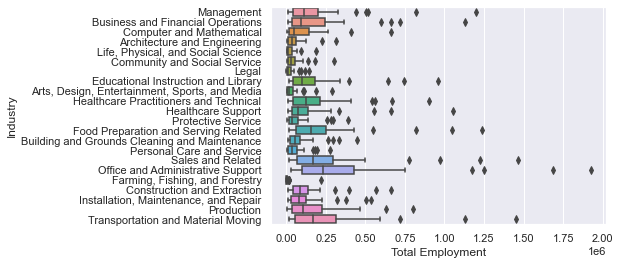

In [56]:
#Boxplot of the industries
sns.boxplot(data=dfBox, x='Total Employment', y='Industry')

In [57]:
#Create a pivot table, industPv,
#that will display Total Employment for each Industry
industPv = pd.pivot_table(dfMain,
                          index=['Industry'],
                          values='Total Employment',
                          aggfunc='sum')

#Drop the All row so it does not interfere with the results
industPv = industPv.drop('All')

#Display the head of the pivot table to ensure it was created properly
industPv.head()

,Total Employment
Industry,
Architecture and Engineering,2436530.0
"Arts, Design, Entertainment, Sports, and Media",1815270.0
Building and Grounds Cleaning and Maintenance,4108790.0
Business and Financial Operations,9053810.0
Community and Social Service,2239710.0


#### The pivot table seems to be working, so lets display the five industries with the highest and lowest total employment. We'll start with the highest.

In [58]:
#Sort and display the five industries with the highest total employment
industPv.sort_values(['Total Employment'], ascending=False).head()

,Total Employment
Industry,
Office and Administrative Support,18299380.0
Sales and Related,13256240.0
Transportation and Material Moving,12639900.0
Food Preparation and Serving Related,11201500.0
Business and Financial Operations,9053810.0


#### We can see that Office and Administrative Support Occupations have the highest total employement amount in the US. Now let's see which one has the lowest total employment.

In [59]:
#Sort and display the five industries with the lowest total employment
industPv.sort_values(['Total Employment'], ascending=True).head()

,Total Employment
Industry,
"Farming, Fishing, and Forestry",452240.0
Legal,1178100.0
"Life, Physical, and Social Science",1273640.0
"Arts, Design, Entertainment, Sports, and Media",1815270.0
Community and Social Service,2239710.0


#### Farming, Fishing, and Forestry Occupations have the lowest total employment amount in the US. Let's see a bar graph to put this data into perspective.

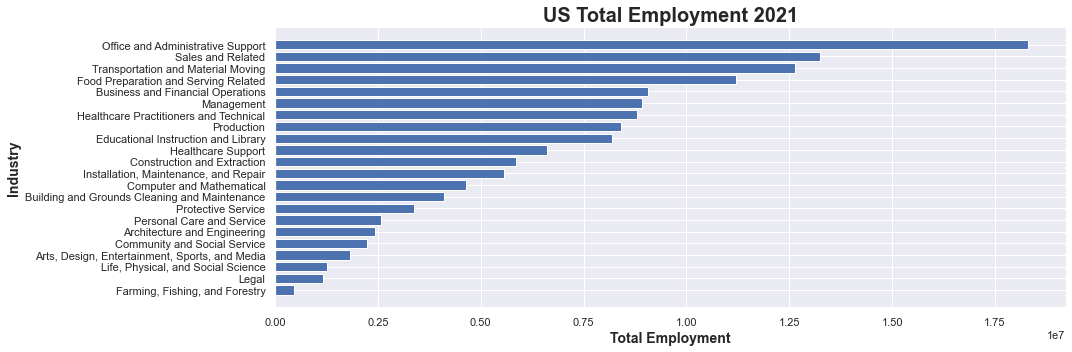

In [60]:
#Make the sort permanent
industPv.sort_values(by='Total Employment', inplace=True)

#Define the size of the figure
plt.rcParams['figure.figsize'] = [15,5]

#Create a horizontal bar graph
plt.barh(industPv.index, industPv['Total Employment'])
#Set x-axis label
plt.xlabel('Total Employment', fontsize=14, fontweight='bold')
#Set y-axis label
plt.ylabel('Industry', fontsize=14, fontweight='bold')
#Set graph title
plt.title('US Total Employment 2021', fontsize=20, fontweight='bold')
#Create a tight layout so nothing overlaps
plt.tight_layout()

#### The bar graph confirms what the pivot table showed us. Office and Administrative Support occupations have the highest total employment amount while Farming, Fishing, and Forestry occupations have the lowest total employment amount.

[(Top)](#toc)

### Which state has the highest and lowest total employment (overall and per industry)? <a name="Q2"></a>

We will find out the total employment in each state. We will also find out the total employment by industry for each state. By doing this, we can see where the majority of the jobs are in the United States.

In [61]:
#Create a pviot table statePv that will display
#the total employment of each sector by state

statePv = pd.pivot_table(dfMain, index=['State Abbrv'],
                         values='Total Employment',
                         columns=['Industry'],
                         aggfunc='sum')

#Display the pivot table head to ensure it was created properly
statePv.head()

Industry,All,Architecture and Engineering,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,Educational Instruction and Library,"Farming, Fishing, and Forestry",...,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Protective Service,Sales and Related,Transportation and Material Moving
State Abbrv,,,,,,,,,,,,,,,,,,,,,
AK,295880.0,6840.0,3090.0,9000.0,12740.0,6400.0,4910.0,18280.0,19260.0,610.0,...,16740.0,2260.0,6700.0,22750.0,38800.0,5370.0,9630.0,8510.0,21240.0,27040.0
AL,1928110.0,46060.0,17300.0,53670.0,89400.0,20220.0,46460.0,84130.0,96070.0,6530.0,...,94520.0,10900.0,11460.0,96070.0,234120.0,29800.0,200950.0,46620.0,197660.0,190000.0
AR,1191000.0,10680.0,10800.0,32500.0,57510.0,13450.0,22660.0,44830.0,72210.0,5000.0,...,56430.0,6610.0,6900.0,73670.0,144260.0,16090.0,109230.0,26180.0,118330.0,133880.0
AZ,2880690.0,47150.0,29210.0,79510.0,192980.0,44960.0,103280.0,135000.0,138450.0,10290.0,...,120500.0,23740.0,19390.0,187280.0,432850.0,48150.0,113790.0,80960.0,265370.0,257420.0
CA,16529810.0,316980.0,291090.0,450060.0,1131460.0,301070.0,662110.0,663570.0,956890.0,220060.0,...,506480.0,145660.0,188490.0,1199620.0,1923910.0,277030.0,799620.0,387910.0,1462530.0,1449500.0


In [62]:
#Sort and display the five states with the highest total employment
statePv.sort_values(['All'], ascending=False).head()

Industry,All,Architecture and Engineering,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,Educational Instruction and Library,"Farming, Fishing, and Forestry",...,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Protective Service,Sales and Related,Transportation and Material Moving
State Abbrv,,,,,,,,,,,,,,,,,,,,,
CA,16529810.0,316980.0,291090.0,450060.0,1131460.0,301070.0,662110.0,663570.0,956890.0,220060.0,...,506480.0,145660.0,188490.0,1199620.0,1923910.0,277030.0,799620.0,387910.0,1462530.0,1449500.0
TX,12226170.0,224440.0,114850.0,330710.0,717320.0,135570.0,411390.0,568930.0,743520.0,16050.0,...,534370.0,83690.0,93980.0,820510.0,1686960.0,192140.0,630880.0,298000.0,1226880.0,1129330.0
NY,8669050.0,99910.0,191400.0,261380.0,662820.0,181800.0,263440.0,311160.0,646320.0,4530.0,...,321770.0,121480.0,65670.0,517360.0,1172410.0,168690.0,283820.0,285900.0,775980.0,582750.0
FL,8605610.0,112270.0,104610.0,297250.0,596080.0,105990.0,229040.0,398060.0,397860.0,16000.0,...,375640.0,95950.0,47300.0,502370.0,1247660.0,180080.0,286060.0,255210.0,969590.0,720860.0
IL,5618830.0,74150.0,67800.0,166190.0,368050.0,86430.0,175110.0,173610.0,341780.0,6310.0,...,205150.0,49810.0,40910.0,442130.0,749700.0,92670.0,383640.0,137700.0,498200.0,593810.0


#### California has the highest total employment.

In [63]:
#Sort and display the five states with the highest total employment
statePv.sort_values(['All'], ascending=True).head()

Industry,All,Architecture and Engineering,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,Educational Instruction and Library,"Farming, Fishing, and Forestry",...,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Protective Service,Sales and Related,Transportation and Material Moving
State Abbrv,,,,,,,,,,,,,,,,,,,,,
WY,260530.0,4090.0,2300.0,10520.0,10250.0,3970.0,2970.0,23190.0,18970.0,720.0,...,16070.0,1670.0,4250.0,13530.0,29070.0,5240.0,11770.0,6500.0,23400.0,24670.0
VT,283990.0,5300.0,3830.0,9670.0,14760.0,10460.0,7070.0,13660.0,24230.0,930.0,...,10990.0,1960.0,2720.0,22890.0,33840.0,4660.0,18590.0,4500.0,24490.0,18170.0
AK,295880.0,6840.0,3090.0,9000.0,12740.0,6400.0,4910.0,18280.0,19260.0,610.0,...,16740.0,2260.0,6700.0,22750.0,38800.0,5370.0,9630.0,8510.0,21240.0,27040.0
ND,395060.0,5270.0,4620.0,13020.0,18680.0,5410.0,6780.0,28000.0,23290.0,1010.0,...,21120.0,2270.0,4090.0,20520.0,47110.0,11020.0,22200.0,7430.0,35600.0,39500.0
SD,421230.0,5370.0,4980.0,16360.0,22810.0,7040.0,8680.0,22980.0,24150.0,1380.0,...,18420.0,1850.0,4270.0,13200.0,57490.0,10840.0,32010.0,6560.0,42580.0,34330.0


#### Wyoming has the lowest total employment.

#### Let's see that visually using a choropleth map and bar graph.

In [64]:
#Create a dictionary that defines the properties of a choropleth map
data = dict(type='choropleth',
            colorscale = 'reds',
            locations = statePv.index,
            z = statePv['All'],
            locationmode = 'USA-states',
            text = statePv.index,
            marker = dict(line = dict(color = 'rgb(0,0,0)',width = 1)),
            colorbar = {'title':"Total Employment"}
            ) 

In [65]:
#Create a dictionary that defines the scope of a choropleth map
layout = dict(title = 'US Total Employment Estimates 2021',
              geo = dict(scope='usa'))

In [66]:
#Assign both dictionaries to a figure
choromap2 = go.Figure(data = [data],layout = layout)

In [67]:
# map data interactively
iplot(choromap2)

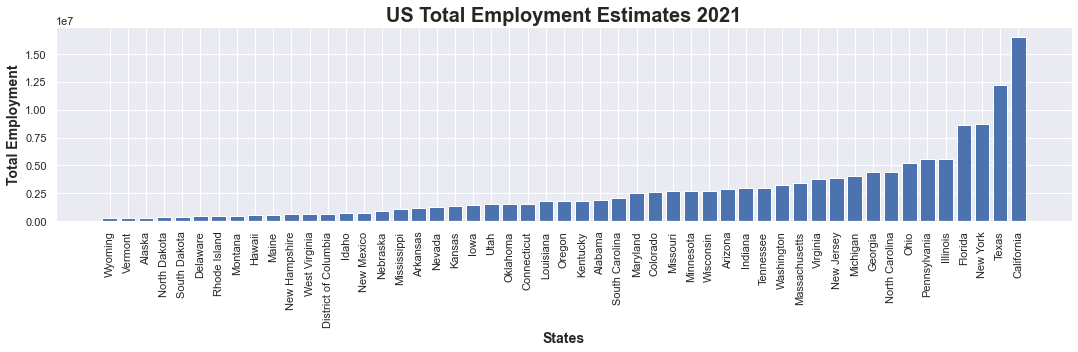

In [68]:
#Create a pivot table statePv2 that is identical to statePv, 
#but will have the full state names instead of abbreviations
statePv2 = pd.pivot_table(dfMain, index=['State'], values='Total Employment', columns=['Industry'])

#Make the sort permanent
statePv2.sort_values(by='All', inplace=True)

#Define the figure size
plt.rcParams['figure.figsize'] = [15,5]
#Create a bar graph using our new pivot table
plt.bar(statePv2.index, statePv2['All'])
#Set the x-axis label
plt.xlabel('States', fontsize=14, fontweight='bold')
#Set the y-axis label
plt.ylabel('Total Employment', fontsize=14, fontweight='bold')
#Set the graph title
plt.title('US Total Employment Estimates 2021', fontsize=20, fontweight='bold')
#Rotate the x-values to make them readable
plt.xticks(rotation=90)
#Create a tight layout so nothing overlaps
plt.tight_layout()

#### For further analysis, two functions have been created that will create an interactive choropleth map and a bar graph for each industry.

In [69]:
#Function to create a choropleth map based on the industry
def makeMap(sector):
    #Create a dictionary that defines the properties of a choropleth map
    data = dict(type='choropleth',
            colorscale = 'reds',
            locations = statePv.index,
            z = statePv[sector],
            locationmode = 'USA-states',
            text = statePv.index,
            marker = dict(line = dict(color = 'rgb(0,0,0)',width = 1)),
            colorbar = {'title':'Total'}
            )
    
    #Create a dictionary that defines the scope of a choropleth map
    layout = dict(title = (sector+' Estimates 2021'),
              geo = dict(scope='usa'))
    
    #Assign both dictionaries to a figure
    choromap = go.Figure(data = [data],layout = layout)
    
    #Return the figure
    return choromap

In [70]:
#Function to create a horizontal bar graph based on the industry
def makeBGraph(sector):
    #Make the sort permanent
    statePv.sort_values(by=sector, inplace=True)

    #Define the size of the figure
    plt.rcParams['figure.figsize'] = [15,5]

    #Create a horizontal bar graph
    plt.bar(statePv.index, statePv[sector])
    #Set x-axis label
    plt.xlabel('States', fontsize=14, fontweight='bold')
    #Set y-axis label
    plt.ylabel('Total Employment', fontsize=14, fontweight='bold')
    #Set graph title
    plt.title((sector+' Estimates 2021'), fontsize=20, fontweight='bold')
    #Rotate the states for readability
    plt.xticks(rotation=90)
    #Create a tight layout so nothing overlaps
    plt.tight_layout()
    return

In [71]:
#Display all column names so we can just copy and paste the names into the functions
statePv.columns

Index(['All', 'Architecture and Engineering',
       'Arts, Design, Entertainment, Sports, and Media',
       'Building and Grounds Cleaning and Maintenance',
       'Business and Financial Operations', 'Community and Social Service',
       'Computer and Mathematical', 'Construction and Extraction',
       'Educational Instruction and Library', 'Farming, Fishing, and Forestry',
       'Food Preparation and Serving Related',
       'Healthcare Practitioners and Technical', 'Healthcare Support',
       'Installation, Maintenance, and Repair', 'Legal',
       'Life, Physical, and Social Science', 'Management',
       'Office and Administrative Support', 'Personal Care and Service',
       'Production', 'Protective Service', 'Sales and Related',
       'Transportation and Material Moving'],
      dtype='object', name='Industry')

In [72]:
#Create an interactive choropleth map based on the industry
iplot(makeMap('Legal'))

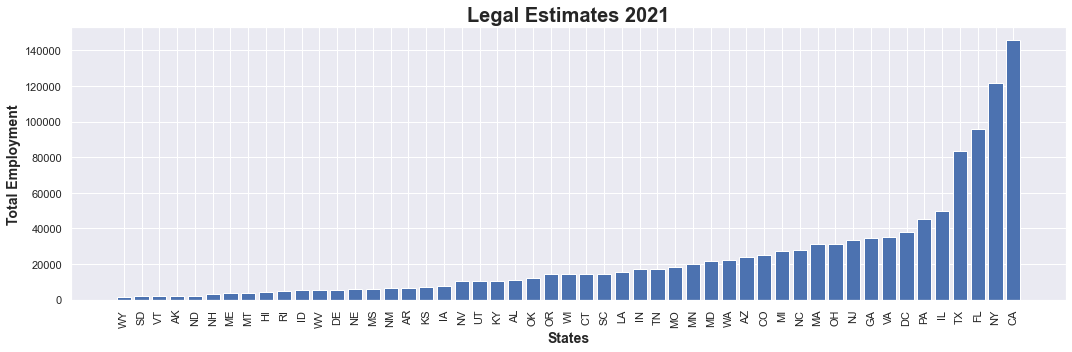

In [73]:
#Create a bar graph based on the industry
makeBGraph('Legal')

[(Top)](#toc)

### What is the employment rate for each state? <a name="Q3"></a>
We have seen how each industry and each state are doing in terms of total employment. States like California, Florida, New York, and Texas had consistently high totals overall and per industry. Let's see if that changes if we factor in the employment rate.

In [74]:
#Dataframe for the 2021 labor force data
dfEmployment = dfLabor[['State', 'State Abbrv', 'CNI Population 2021', 'Labor Force 2021', 'Employment Total 2021', 'Employment Rate 2021']]

#Set the index to State
dfEmployment.set_index('State', inplace=True)

#Display dataframe head to verify proper creation
dfEmployment.head()

,State Abbrv,CNI Population 2021,Labor Force 2021,Employment Total 2021,Employment Rate 2021
State,,,,,
Alabama,AL,3970436,2249901,2169710,54.6
Alaska,AK,545149,353153,329080,60.4
Arizona,AZ,5742205,3519581,3329319,58.0
Arkansas,AR,2354084,1332758,1274656,54.1
California,CA,31011360,18913379,17414749,56.2


In [75]:
#Descriptive statistics of the 2021 labor force
dfEmployment.describe()

,CNI Population 2021,Labor Force 2021,Employment Total 2021,Employment Rate 2021
count,5.100000e+01,5.100000e+01,5.100000e+01,51.000000
mean,5.137861e+06,3.172085e+06,2.991842e+06,59.249020
std,5.826830e+06,3.559404e+06,3.312355e+06,3.894631
min,4.526210e+05,2.907530e+05,2.771030e+05,51.700000
25%,1.450840e+06,8.523915e+05,8.112190e+05,56.250000
50%,3.529835e+06,2.069990e+06,1.947251e+06,59.100000
75%,5.940083e+06,3.821066e+06,3.603084e+06,61.250000
max,3.101136e+07,1.891338e+07,1.741475e+07,67.600000


In [76]:
#Sort and show the five states with the highest employment rates
dfEmployment.sort_values(by='Employment Rate 2021', ascending=False).head()

,State Abbrv,CNI Population 2021,Labor Force 2021,Employment Total 2021,Employment Rate 2021
State,,,,,
Nebraska,NE,1507717,1046228,1019663,67.6
South Dakota,SD,681456,467651,452714,66.4
Utah,UT,2467460,1678424,1630846,66.1
North Dakota,ND,592969,405568,390192,65.8
Minnesota,MN,4488610,3012884,2910210,64.8


#### Nebraska has the highest employment rate.

In [77]:
#Sort and show the five states with the lowest employment rates
dfEmployment.sort_values(by='Employment Rate 2021', ascending=True).head()

,State Abbrv,CNI Population 2021,Labor Force 2021,Employment Total 2021,Employment Rate 2021
State,,,,,
West Virginia,WV,1442160,788988,746278,51.7
Mississippi,MS,2277353,1258053,1182114,51.9
New Mexico,NM,1662634,943858,876160,52.7
Arkansas,AR,2354084,1332758,1274656,54.1
Louisiana,LA,3567333,2069990,1947251,54.6


#### West Virginia has the lowest employment rate.

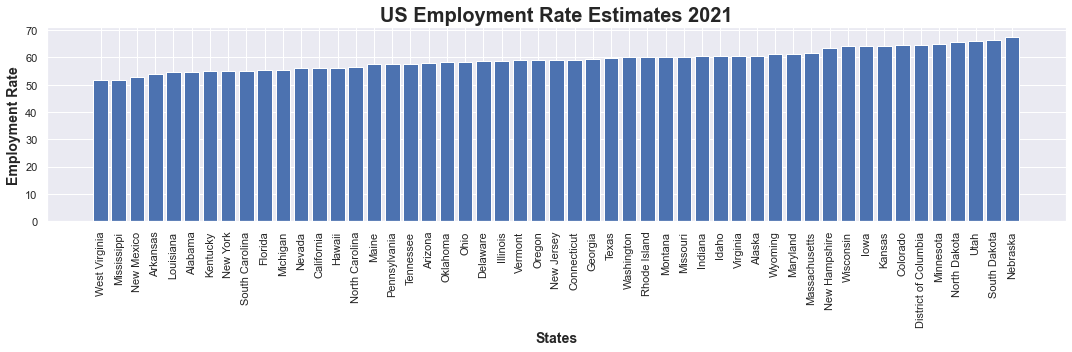

In [78]:
#Make the sort permanent
dfEmployment.sort_values(by='Employment Rate 2021', inplace=True)

#Define the figure size
plt.rcParams['figure.figsize'] = [15,5]
#Create a bar graph using our new pivot table
plt.bar(dfEmployment.index, dfEmployment['Employment Rate 2021'])
#Set the x-axis label
plt.xlabel('States', fontsize=14, fontweight='bold')
#Set the y-axis label
plt.ylabel('Employment Rate', fontsize=14, fontweight='bold')
#Set the graph title
plt.title('US Employment Rate Estimates 2021', fontsize=20, fontweight='bold')
#Rotate the x-values to make them readable
plt.xticks(rotation=90)
#Create a tight layout so nothing overlaps
plt.tight_layout()

#### Even though California had the highest total employment, it is in the bottom 25% in terms of employment rate, according to the descriptive statistics we created earlier. Nebraska has the highest employment rate while West Virginia has the lowest employment rate.

#### Let's see this as a choropleth map.

In [79]:
#Create a dictionary that defines the properties of a choropleth map
data = dict(type='choropleth',
            colorscale = 'reds',
            locations = dfEmployment['State Abbrv'],
            z = dfEmployment['Employment Rate 2021'],
            locationmode = 'USA-states',
            text = dfEmployment.index,
            marker = dict(line = dict(color = 'rgb(0,0,0)',width = 1)),
            colorbar = {'title':'Employment Rate'}
            )

#Create a dictionary that defines the scope of a choropleth map
layout = dict(title = ('Employment Rate Estimates 2021'),
              geo = dict(scope='usa'))

#Assign both dictionaries to a figure
choromap = go.Figure(data = [data],layout = layout)

In [80]:
#Plot and display an interactive map of the data
iplot(choromap)

### What industry has the lowest and highest average annual wage? <a name="Q4"></a>

Next, we will explore which industries have the lowest and highest median pay on a national level. The state-level dataset will be used again when displaying the choropleth map. Guam, Puerto Rico, and the Virgin Islands are not counted in the national-level dataset.

In [81]:
#Pivot table to hold the annual wage mean by industry 
payPv = pd.pivot_table(df21.drop(df21[(df21.Industry == 'All')].index),
                       index=['Industry'], values='Annual Wage Mean 2021',
                       aggfunc='sum')

#Verify the pivot table was created
payPv.head()

,Annual Wage Mean 2021
Industry,
Architecture and Engineering,91740
"Arts, Design, Entertainment, Sports, and Media",66100
Building and Grounds Cleaning and Maintenance,33750
Business and Financial Operations,82610
Community and Social Service,53960


In [82]:
#Sort and display the five highest annual wage means
payPv.sort_values(['Annual Wage Mean 2021'], ascending=False).head()

,Annual Wage Mean 2021
Industry,
Management,123370
Legal,113100
Computer and Mathematical,99860
Architecture and Engineering,91740
Healthcare Practitioners and Technical,91100


#### The <i>Managment</i> industry has the highest annual wage average.

In [83]:
#Sort and display the five lowest annual wage means
payPv.sort_values(['Annual Wage Mean 2021'], ascending=True).head()

,Annual Wage Mean 2021
Industry,
Food Preparation and Serving Related,29450
Healthcare Support,33330
Personal Care and Service,33620
Building and Grounds Cleaning and Maintenance,33750
"Farming, Fishing, and Forestry",34730


#### The <i>Food Preparation and Serving Related</i> industry has the lowest average annual wage.

#### Let's see that visually with a bar graph.

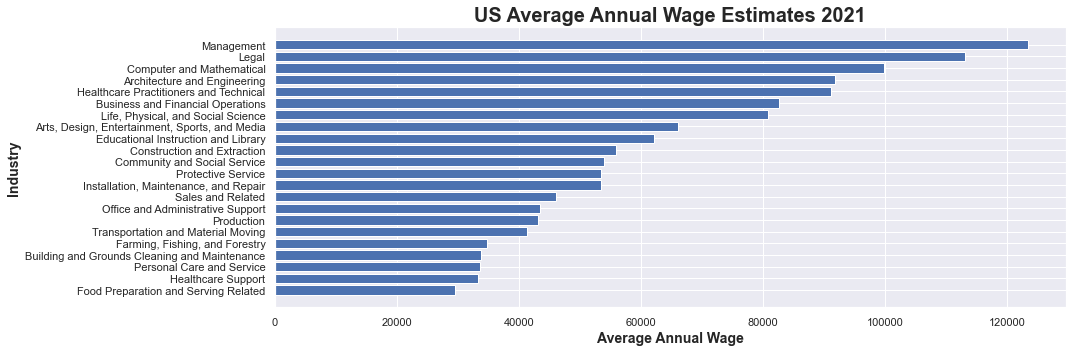

In [84]:
#Make the sort permanent
payPv.sort_values(by='Annual Wage Mean 2021', inplace=True)
#Define the figure size
plt.rcParams['figure.figsize'] = [15,5]
#Create a horizontal bar graph
plt.barh(payPv.index, payPv['Annual Wage Mean 2021'])
#Set the x-axis label
plt.xlabel('Average Annual Wage', fontsize=14, fontweight='bold')
#Set the y-axis label
plt.ylabel('Industry', fontsize=14, fontweight='bold')
#Set the title
plt.title('US Average Annual Wage Estimates 2021', fontsize=20, fontweight='bold')
#Use the tight leyout so nothing overlaps
plt.tight_layout()

In [85]:
#Pivot table to hold the annual wage mean for each industry by state
payPv2 = pd.pivot_table(dfMain, index=['State Abbrv'], values='Annual Wage Mean', columns=['Industry'])

# verify proper loading
payPv2.head()

Industry,All,Architecture and Engineering,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,Educational Instruction and Library,"Farming, Fishing, and Forestry",...,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Protective Service,Sales and Related,Transportation and Material Moving
State Abbrv,,,,,,,,,,,,,,,,,,,,,
AK,63480.0,103910.0,51700.0,37490.0,81910.0,58040.0,83340.0,71420.0,62510.0,43990.0,...,66230.0,96760.0,78430.0,108140.0,48150.0,38760.0,53930.0,64470.0,41500.0,55940.0
AL,48110.0,93350.0,48550.0,27300.0,74720.0,45860.0,88510.0,43910.0,54620.0,35690.0,...,51100.0,93320.0,69380.0,106210.0,37190.0,28050.0,39210.0,41730.0,37230.0,35480.0
AR,46500.0,74420.0,48140.0,28300.0,67190.0,45230.0,76340.0,41910.0,49850.0,35910.0,...,46340.0,73890.0,63510.0,92460.0,37150.0,28660.0,38420.0,40310.0,38220.0,38000.0
AZ,55170.0,90910.0,54840.0,33190.0,73390.0,49200.0,92530.0,50150.0,52100.0,33260.0,...,50690.0,91000.0,70090.0,108810.0,41830.0,36000.0,42900.0,50360.0,44830.0,41240.0
CA,68510.0,108540.0,83870.0,39600.0,90090.0,63820.0,122200.0,66450.0,75500.0,33450.0,...,59680.0,137110.0,90230.0,141440.0,49460.0,39140.0,45400.0,65170.0,51860.0,44130.0


In [86]:
# this function inputs desired industry / sector and outputs a choropleth map
# map of USA
# consolidates median wages into gradients

def makeMap2(sector):
    data = dict(type='choropleth',
            colorscale = 'reds',
            locations = payPv2.index,
            z = payPv2[sector],
            locationmode = 'USA-states',
            text = payPv2.index,
            marker = dict(line = dict(color = 'rgb(0,0,0)',width = 1)),
            colorbar = {'title':'Total'}
            )
    
    layout = dict(title = (sector+' Average Annual Wage Estimates 2021'),
              geo = dict(scope='usa'))
    
    choromap = go.Figure(data = [data],layout = layout)
    
    return choromap

In [87]:
# this function behaves the same way as the above
# outputs bar graph (voided function; no return value; only performs operation)

def makeBGraph2(sector):
    payPv2.sort_values(by=sector, inplace=True)

    plt.rcParams['figure.figsize'] = [15,5]

    plt.bar(payPv2.index, payPv2[sector])
    plt.xlabel('States', fontsize=14, fontweight='bold')
    plt.ylabel('Total Employment', fontsize=14, fontweight='bold')
    plt.title((sector+' Average Annual Wage Estimates 2021'), fontsize=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [88]:
#Display column names for copying and pasting
payPv2.columns

Index(['All', 'Architecture and Engineering',
       'Arts, Design, Entertainment, Sports, and Media',
       'Building and Grounds Cleaning and Maintenance',
       'Business and Financial Operations', 'Community and Social Service',
       'Computer and Mathematical', 'Construction and Extraction',
       'Educational Instruction and Library', 'Farming, Fishing, and Forestry',
       'Food Preparation and Serving Related',
       'Healthcare Practitioners and Technical', 'Healthcare Support',
       'Installation, Maintenance, and Repair', 'Legal',
       'Life, Physical, and Social Science', 'Management',
       'Office and Administrative Support', 'Personal Care and Service',
       'Production', 'Protective Service', 'Sales and Related',
       'Transportation and Material Moving'],
      dtype='object', name='Industry')

In [89]:
#Create a choropleth map based on the industry
iplot(makeMap2('Legal'))

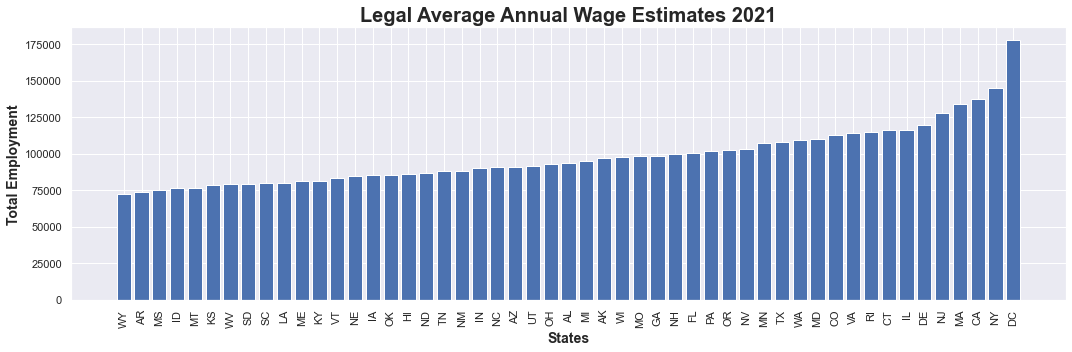

In [90]:
#Create a bar graph based on the industry
makeBGraph2('Legal')

[(Top)](#toc)

[(Top)](#toc)

# Exploratory Data Analysis <a name="explore"></a>
We have displayed the totals across the United States to show a general overview of the job market in May 2021. Now we will conduct statistical tests to see correlation of variables like labor force and total employment and changes throughout the years.

### Is the employment rate normally distributed? <a name="Q5"></a>
We saw from the previous bar graphs that, while the total employment was pretty skewed, the employment rate for May 2021 was pretty even across all 50 states and DC. Does that mean it is normally distributed? 

We'll conduct a normal test to find out. We can input the employment rate for all the years at the same time to get the corresponding statistic variable and p-value, which saves us time.

For our hypothesis test, the null hypothesis is the employment rate is normally distributed and the alternative hypothesis is the employment rate is not normally distributed. The significance level or alpha will be 0.05 since that is usually the standard when conducting hypothesis tests.

#### H<sub>0</sub>: The employment rate is normally distributed
#### H<sub>1</sub>: The employment rate is not normally distributed
#### α = 0.05

In [91]:
#Conduct a normal distribution test for each year using the function normaltest
#The results will be stored in two arrays, stat and p
stat, p = normaltest(dfLabor[['Employment Rate 2017', 'Employment Rate 2018', 'Employment Rate 2019',
                    'Employment Rate 2020', 'Employment Rate 2021']])

#Print the values of the arrays for the corresponding year
print('2017 statistic and p-value: %5.4f, %5.4f' %(stat[0], p[0]))
print('2018 statistic and p-value: %5.4f, %5.4f' %(stat[1], p[1]))
print('2019 statistic and p-value: %5.4f, %5.4f' %(stat[2], p[2]))
print('2020 statistic and p-value: %5.4f, %5.4f' %(stat[3], p[3]))
print('2021 statistic and p-value: %5.4f, %5.4f' %(stat[4], p[4]))

2017 statistic and p-value: 0.4696, 0.7907
2018 statistic and p-value: 0.7872, 0.6746
2019 statistic and p-value: 0.6544, 0.7209
2020 statistic and p-value: 0.1511, 0.9272
2021 statistic and p-value: 1.0491, 0.5918


#### We can see the p-value for each year is greater than the significance level 0.05. This means that we do not have enough evidence, so we fail to reject the null hypothesis for each year. We can conclude that the data is most likely normally distributed. Let's create a graph for each year to see the actual distribution.

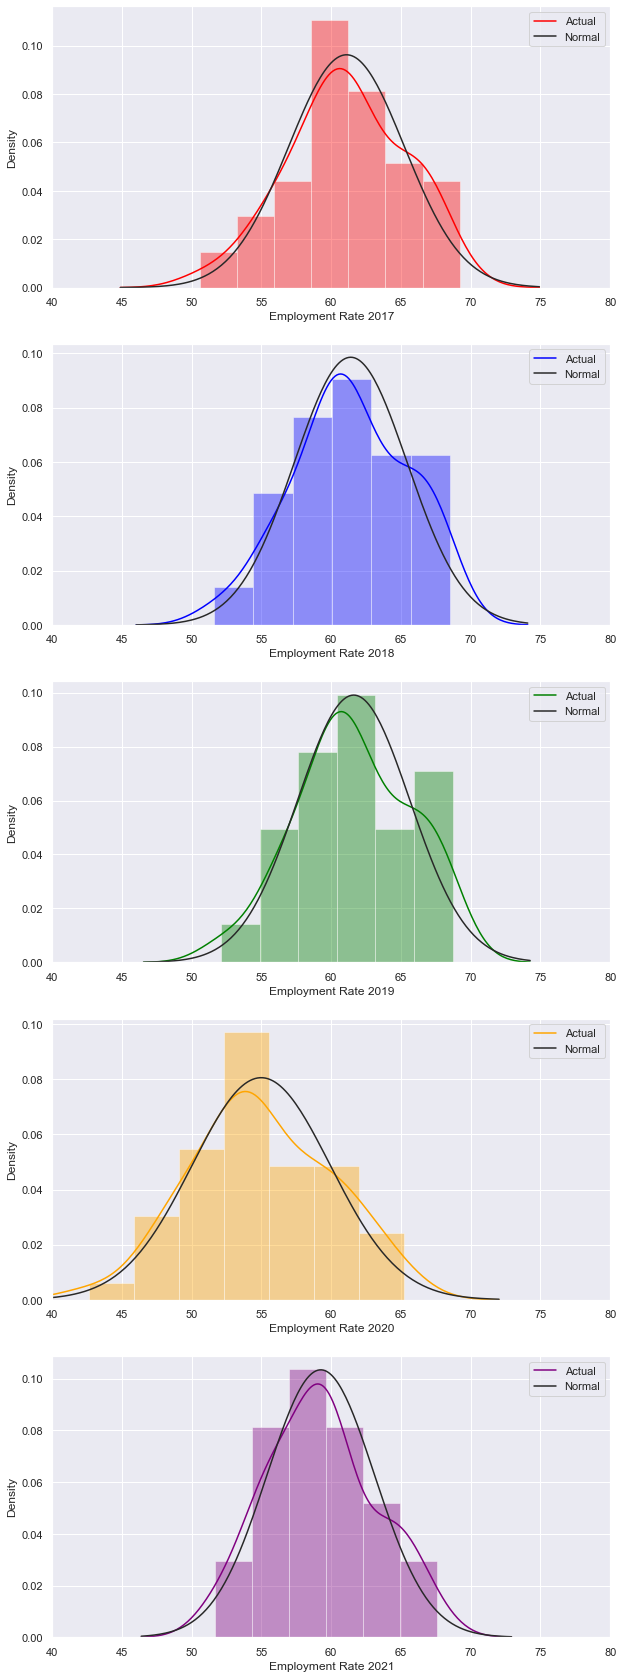

In [92]:
#Create subplots for each year
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,30))
#Limit the x-axis so the plots are more focused
plt.setp(axes, xlim=(40, 80))

#Create a distribution plot for each year with different colors
#The graph will also also the normal distribution
sns.distplot(dfLabor[['Employment Rate 2017']], color='red',
             axlabel='Employment Rate 2017',
             ax=axes[0], fit=norm)
#Create a legend for the graph to identify the actual and normal distributions
axes[0].legend(labels=['Actual', 'Normal'])

#Create a distribution plot for each year with different colors
#The graph will also also the normal distribution
sns.distplot(dfLabor[['Employment Rate 2018']], color='blue',
             axlabel='Employment Rate 2018',
             ax=axes[1], fit=norm)
#Create a legend for the graph to identify the actual and normal distributions
axes[1].legend(labels=['Actual', 'Normal'])

#Create a distribution plot for each year with different colors
#The graph will also also the normal distribution
sns.distplot(dfLabor[['Employment Rate 2019']], color='green',
             axlabel='Employment Rate 2019',
             ax=axes[2], fit=norm)
#Create a legend for the graph to identify the actual and normal distributions
axes[2].legend(labels=['Actual', 'Normal'])

#Create a distribution plot for each year with different colors
#The graph will also also the normal distribution
sns.distplot(dfLabor[['Employment Rate 2020']], color='orange',
             axlabel='Employment Rate 2020',
             ax=axes[3], fit=norm)
#Create a legend for the graph to identify the actual and normal distributions
axes[3].legend(labels=['Actual', 'Normal'])

#Create a distribution plot for each year with different colors
#The graph will also also the normal distribution
sns.distplot(dfLabor[['Employment Rate 2021']], color='purple',
             axlabel='Employment Rate 2021',
             ax=axes[4], fit=norm)
#Create a legend for the graph to identify the actual and normal distributions
axes[4].legend(labels=['Actual', 'Normal'])

#### The actual distribution is not a perfect match, but it is pretty close to a normal distribution. Remember that the hypothesis test only tests the probability of the results if we assume the null hypothesis is true. It doesn't mean the null hypothesis is fact as demonstrated in the actual distribution of employment rate for each year.

[(Top)](#toc)

### Is the total employment and labor force correlated? <a name="Q6"></a>
We want to find out if there is a correlation between the total employment and the labor force in each state. We saw that states with high total employment also had a large labor force, so must be a correlation right?

Our null hypothesis will be that there is no correlation and our alternative hypothesis will be that there is correlation. Once again, the significance level will be 0.05.

#### H<sub>0</sub> = There is no correlation between the total employment and the labor force
#### H<sub>1</sub> = There is correlation between the total employment and the labor force
#### α = 0.05

In [93]:
#Create a temporary dataframe to hold the total employment numbers from the dataframe about the industries
dfTemp = dfMain[dfMain['Industry'].isin(['All'])]

#Create a second temporary dataframe to reduce the size of the other dataframe
dfTemp2 = dfTemp[['State', 'Total Employment']]

#Create a new dataframe to merge the temporary one with the labor force 2021 dataframe
dfStateTot = pd.merge(left=dfTemp2, right=dfLF21, how='left',
                   left_on='State', right_on='State')

#Drop unwanted columns
dfStateTot.drop(['CNI Population 2021', 'Participation Rate 2021',
         'Participation Rate 2021', 'Employment Total 2021',
         'Employment Rate 2021', 'Unemployment Total 2021',
         'Unemployment Rate 2021'], axis=1, inplace=True)

#Display the head of the dataframe to ensure it was created properly
dfStateTot.head()

,State,Total Employment,Labor Force 2021
0,Alabama,1928110.0,2249901
1,Alaska,295880.0,353153
2,Arizona,2880690.0,3519581
3,Arkansas,1191000.0,1332758
4,California,16529810.0,18913379


In [94]:
#Conduct a correlation test using the pearsonr function
pearsonr(dfStateTot['Labor Force 2021'], dfStateTot['Total Employment'])

(0.9992175066624187, 2.0715719889411077e-70)

#### The first number is the correlation coefficient and the second number is the p-value. We could not format the results like the normal test becuse the we wanted to show how small the p-value really is. We can see that the p-value is a lot smaller than the signifiance level. This means we reject the null hypothesis in favor of the alternative. We can also conclude that there is a strong positive correlation because our correlation coefficient is close to 1.

#### Let's see the conclusion visually

<AxesSubplot:xlabel='Labor Force 2021', ylabel='Total Employment'>

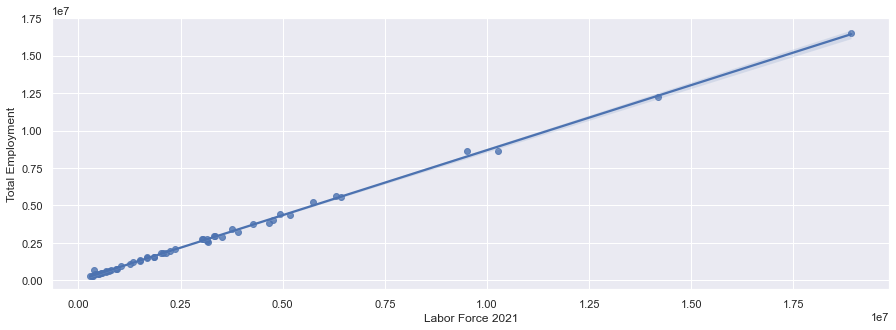

In [95]:
#Create a linear regression plot to show the results of th correlation test
sns.regplot(data=dfStateTot, x='Labor Force 2021', y='Total Employment')

#### The graph confirms the results. The line is moving upwards and the points are very close to the line, showing the strong positive correlation between the labor force and total employment.

[(Top)](#toc)

### Is the annual wage average and total employment correlated? <a name="Q7"></a>

We observed, by industry, the highest:
  - annual wages
  - employment
   
It begs to ask:
  - Do annual wages and employment correlate with one another?
  - How, if at all, do average annual wage and total employment relate?

Since industries have different barriers to entry, proper testing demands careful handling. Instead of performing a single, sweeping correlation test, we will conduct on four industries. We will draw separate conclusions from each test. These industries were selected with an online random number generator:
  - <strong>Office and Administrative Support</strong>
  - <strong>Building and Grounds Cleaning and Maintenance</strong>
  - <strong>Healthcare Practitioners and Technical</strong>
  - <strong>Healthcare Support</strong>

Each test shares the same null and alt. hypotheses with significance level 0.05.

<strong>H<sub>0</sub> = There is no correlation between total employment and mean wage</strong><br>
<strong>H<sub>1</sub> = There is correlation between total employment and mean wage</strong><br>
<strong>α = 0.05</strong><br>

This function facilitates dataframe creation (all dataframes are similar) -->

In [96]:
#Create a function that will create a dataframe to be used for a correlation test
def createCorrDF(industry):
    #Create a temporary dataframe to hold the total employment numbers from the industry
    dfTemp = dfMain[dfMain['Industry'].isin([industry])]

    #Create a dataframe to only include the columns we want
    df = dfTemp[['State', 'Industry', 'Total Employment', 'Annual Wage Mean']]
    
    return df

#### We'll procede sequentially:
#### Test #1 -- <i>Office and Administrative Support</i>.

In [97]:
#Call createCorrDF to create a dataframe for the industry
dfOAS = createCorrDF('Office and Administrative Support')

# verify results
dfOAS.head()

,State,Industry,Total Employment,Annual Wage Mean
17,Alabama,Office and Administrative Support,234120.0,37190.0
40,Alaska,Office and Administrative Support,38800.0,48150.0
63,Arizona,Office and Administrative Support,432850.0,41830.0
86,Arkansas,Office and Administrative Support,144260.0,37150.0
109,California,Office and Administrative Support,1923910.0,49460.0


In [98]:
#Conduct a correlation test using the pearsonr function
pearsonr(dfOAS['Total Employment'], dfOAS['Annual Wage Mean'])

(0.19625749686873056, 0.16750100763791312)

#### Since the p-value > the significance level, we fail to reject the null hypothesis. This means the <i>Office and Administrative Support</i> industry's total employment and mean wage are probably not correlated.

#### To visualize --

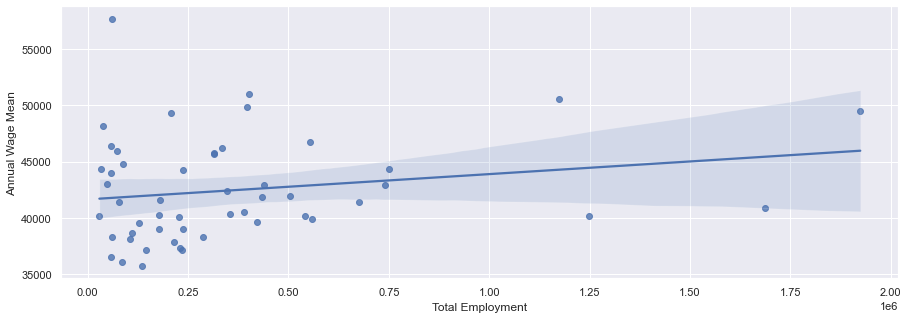

In [99]:
#Create a linear regression plot to show the results of th correlation test
sns.regplot(data=dfOAS, x='Total Employment', y='Annual Wage Mean')

#Use plt.show() because we only care about the graph
plt.show()

#### With a slightly up-tilted line and a correlation coefficient of 0.1963, a positive correlation is likely, but this assertion is weak since the coefficient is close to 0. We conclude there is weak to no correlation between the <i>Office and Administrative Support</i> industry's total employment and mean wage.

#### Test #2 -- <i>Building and Grounds Cleaning and Maintenance</i>.

In [100]:
#Call createCorrDF to create a dataframe for the industry
dfBGCM = createCorrDF('Building and Grounds Cleaning and Maintenance')

# verify results
dfBGCM.head()

,State,Industry,Total Employment,Annual Wage Mean
14,Alabama,Building and Grounds Cleaning and Maintenance,53670.0,27300.0
37,Alaska,Building and Grounds Cleaning and Maintenance,9000.0,37490.0
60,Arizona,Building and Grounds Cleaning and Maintenance,79510.0,33190.0
83,Arkansas,Building and Grounds Cleaning and Maintenance,32500.0,28300.0
106,California,Building and Grounds Cleaning and Maintenance,450060.0,39600.0


In [101]:
#Conduct a correlation test using the pearsonr function
pearsonr(dfBGCM['Total Employment'], dfBGCM['Annual Wage Mean'])

(0.1151006544540375, 0.42123333812136043)

#### Since the p-value > the significance level, we fail to reject the null hypothesis. Hence, the <i>Building and Grounds Cleaning and Maintenance</i> industry's total employment and mean wage are likely not correlated.

#### To visualize --

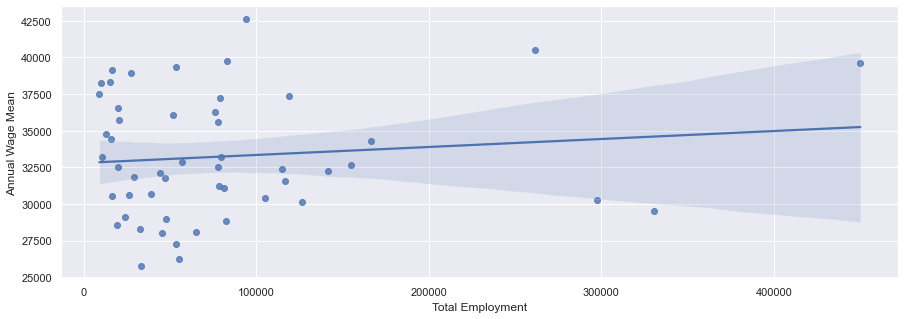

In [102]:
#Create a linear regression plot to show the results of the correlation test
sns.regplot(data=dfBGCM, x='Total Employment', y='Annual Wage Mean')

#Use plt.show() because we only care about the graph
plt.show()

#### As before, a slightly up-tilted line and a correlation coefficient of 0.1151 hints at positive correlation, but this assertion is weak since the coefficient is close to 0. We conclude there is weak to no correlation between the <i>Building and Grounds Cleaning and Maintenance</i> industry's total employment and mean wage.

#### Test #3 -- <i>Healthcare Practitioners and Technical</i>.

In [103]:
#Call createCorrDF to create a dataframe for the industry
dfHPT = createCorrDF('Healthcare Practitioners and Technical')

# verify results
dfHPT.head()

,State,Industry,Total Employment,Annual Wage Mean
10,Alabama,Healthcare Practitioners and Technical,131260.0,71790.0
33,Alaska,Healthcare Practitioners and Technical,19460.0,105660.0
56,Arizona,Healthcare Practitioners and Technical,173790.0,91820.0
79,Arkansas,Healthcare Practitioners and Technical,79780.0,78040.0
102,California,Healthcare Practitioners and Technical,901180.0,115220.0


In [104]:
#Conduct a correlation test using the pearsonr function
pearsonr(dfHPT['Total Employment'], dfHPT['Annual Wage Mean'])

(0.1406688550027258, 0.32483105512799487)

#### The p-value > the significance level, so we fail to reject the null hypothesis. This means the <i>Healthcare Practitioners and Technical</i> industry's total employment and mean wage are probably not correlated.

#### To visualize --

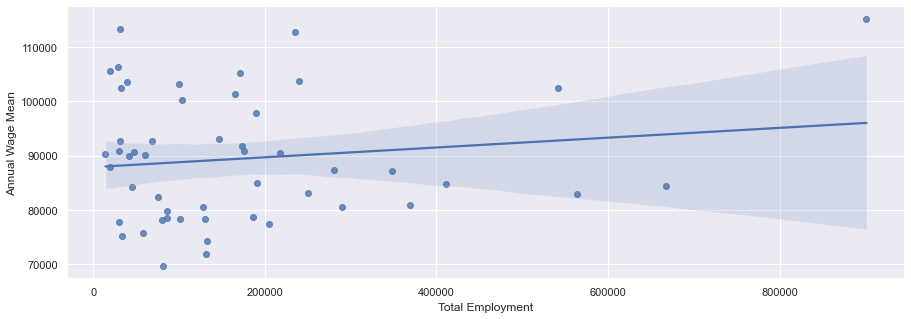

In [105]:
#Create a linear regression plot to show the results of the correlation test
sns.regplot(data=dfHPT, x='Total Employment', y='Annual Wage Mean')

#Use plt.show() because we only care about the graph
plt.show()

#### Once again, we can see the line moves slightly upwards. This along with the correlation coefficient, 0.1407, suggests that there is a positive correlation, but it is weak since the coefficient is close to 0. We conclude there is weak to no correlation between the <i>Healthcare Practitioners and Technical</i> industry's total employment and mean wage.

#### (Final) Test #4 -- <i>Healthcare Support</i>.

In [106]:
#Call createCorrDF to create a dataframe for the industry
dfHS = createCorrDF('Healthcare Support')

# verify results
dfHS.head()

,State,Industry,Total Employment,Annual Wage Mean
11,Alabama,Healthcare Support,65550.0,27940.0
34,Alaska,Healthcare Support,12830.0,42080.0
57,Arizona,Healthcare Support,131930.0,33940.0
80,Arkansas,Healthcare Support,48980.0,29280.0
103,California,Healthcare Support,1056580.0,35820.0


In [107]:
#Conduct a correlation test using the pearsonr function
pearsonr(dfHS['Total Employment'], dfHS['Annual Wage Mean'])

(0.04481793847271638, 0.7548229544399169)

#### The p-value > the significance level, so we fail to reject the null hypothesis. This means the <i>Healthcare Support</i> industry's total employment and mean wage are probably not correlated.

#### To visualize --

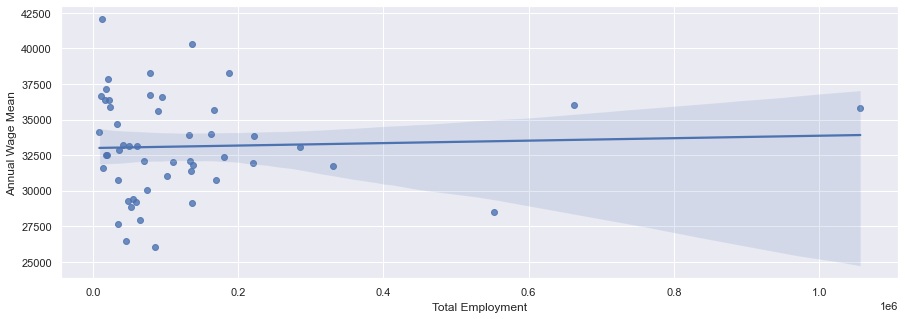

In [108]:
#Create a linear regression plot to show the results of th correlation test
sns.regplot(data=dfHS, x='Total Employment', y='Annual Wage Mean')
#Use plt.show() because we only care about the graph
plt.show()

#### Once again, we can see the line moves slightly upwards. This along with the correlation coefficient, 0.0448, suggests that there is a positive correlation, but it is weak since the coefficient is close to 0. We can conclude there is weak to no correlation between the <i>Healthcare Support</i> industry's total employment and mean wage.

#### We failed to reject the null hypothesis and concluded that there is weak to no correlation between the industries' total employment and mean wage. It might be education and skill that affect the mean wage instead of how large that industry is, but we lack sufficient data for a proper test.

[(Top)](#toc)

### Is the wage average changing? <a name="Q8"></a>
We want to see if the annual wage average is changing over a five year period. We can also see if the pandemic may have had an impact on it as we look at the change from 2019 to 2020. We will do another hypothesis test with a significance level of 0.05. This time we will use an one-way ANOVA test to determine if the annual wage average is changing.

#### H<sub>0</sub> = The annual wage average is not changing
#### H<sub>1</sub> = The annual wage average is changing
#### α = 0.05

We will get the data from the national estimate mega dataframe we created in the beginning. Using the data, we will calculate the percentage change from year to year and use that percent in the ANOVA test.

In [109]:
#Make dataframe
dfNat2 = dfNat[['Industry', 'Annual Wage Mean 2017','Annual Wage Mean 2018',
                'Annual Wage Mean 2019','Annual Wage Mean 2020',
                'Annual Wage Mean 2021']]

dfNat2.head()

,Industry,Annual Wage Mean 2017,Annual Wage Mean 2018,Annual Wage Mean 2019,Annual Wage Mean 2020,Annual Wage Mean 2021
0,All,50620,51960,53490,56310,58260
1,Management,119910,121560,122480,126480,123370
2,Business and Financial Operations,76330,76910,78130,80680,82610
3,Computer and Mathematical,89810,91530,93760,96770,99860
4,Architecture and Engineering,86190,87370,88800,90300,91740


In [110]:
#Calculate change percentage for every year
dfNat2['Percent Change 2017-2018'] = np.round((1 - (dfNat['Annual Wage Mean 2018']/dfNat['Annual Wage Mean 2017']))*-100, 2)
dfNat2['Percent Change 2018-2019'] = np.round((1 - (dfNat['Annual Wage Mean 2019']/dfNat['Annual Wage Mean 2018']))*-100, 2)
dfNat2['Percent Change 2019-2020'] = np.round((1 - (dfNat['Annual Wage Mean 2020']/dfNat['Annual Wage Mean 2019']))*-100, 2)
dfNat2['Percent Change 2020-2021'] = np.round((1 - (dfNat['Annual Wage Mean 2021']/dfNat['Annual Wage Mean 2020']))*-100, 2)
dfNat2['Percent Change 2017-2021'] = np.round((1 - (dfNat['Annual Wage Mean 2021']/dfNat['Annual Wage Mean 2017']))*-100, 2)

In [111]:
#One way ANOVA test to see if average annual wage is changing
f_oneway(dfNat2['Percent Change 2017-2018'],
         dfNat2['Percent Change 2018-2019'],
         dfNat2['Percent Change 2019-2020'],
         dfNat2['Percent Change 2020-2021'])

F_onewayResult(statistic=2.796687596329179, pvalue=0.044811837060068783)

#### The p-value is 0.0448, which is smaller than the significance level. This means we reject the null in favor of the alternative. We can conclude that the annual wage average is changing.

#### Let's see the data ourselves and determine if that's really true.

In [112]:
#Display years for comparison
dfNat2[['Industry', 'Annual Wage Mean 2017',
        'Annual Wage Mean 2018', 'Annual Wage Mean 2019',
        'Annual Wage Mean 2020', 'Annual Wage Mean 2021']]

,Industry,Annual Wage Mean 2017,Annual Wage Mean 2018,Annual Wage Mean 2019,Annual Wage Mean 2020,Annual Wage Mean 2021
0,All,50620,51960,53490,56310,58260
1,Management,119910,121560,122480,126480,123370
2,Business and Financial Operations,76330,76910,78130,80680,82610
3,Computer and Mathematical,89810,91530,93760,96770,99860
4,Architecture and Engineering,86190,87370,88800,90300,91740
5,"Life, Physical, and Social Science",74370,76160,77540,79360,80730
6,Community and Social Service,48050,49280,50480,52180,53960
7,Legal,107370,108690,109630,112320,113100
8,Educational Instruction and Library,55470,56620,57710,59810,62140
9,"Arts, Design, Entertainment, Sports, and Media",58950,59780,61960,64400,66100


In [113]:
#Display percent changes for comparison
dfNat2[['Industry', 'Percent Change 2017-2018',
        'Percent Change 2018-2019', 'Percent Change 2019-2020',
        'Percent Change 2020-2021', 'Percent Change 2017-2021']]

,Industry,Percent Change 2017-2018,Percent Change 2018-2019,Percent Change 2019-2020,Percent Change 2020-2021,Percent Change 2017-2021
0,All,2.65,2.94,5.27,3.46,15.09
1,Management,1.38,0.76,3.27,-2.46,2.89
2,Business and Financial Operations,0.76,1.59,3.26,2.39,8.23
3,Computer and Mathematical,1.92,2.44,3.21,3.19,11.19
4,Architecture and Engineering,1.37,1.64,1.69,1.59,6.44
5,"Life, Physical, and Social Science",2.41,1.81,2.35,1.73,8.55
6,Community and Social Service,2.56,2.44,3.37,3.41,12.30
7,Legal,1.23,0.86,2.45,0.69,5.34
8,Educational Instruction and Library,2.07,1.93,3.64,3.90,12.02
9,"Arts, Design, Entertainment, Sports, and Media",1.41,3.65,3.94,2.64,12.13


#### Even though there are a few times the annual wage average decreased, we can see the annual wage average has actually grown over the past five years.

#### Let's see those changes on a bar graph.

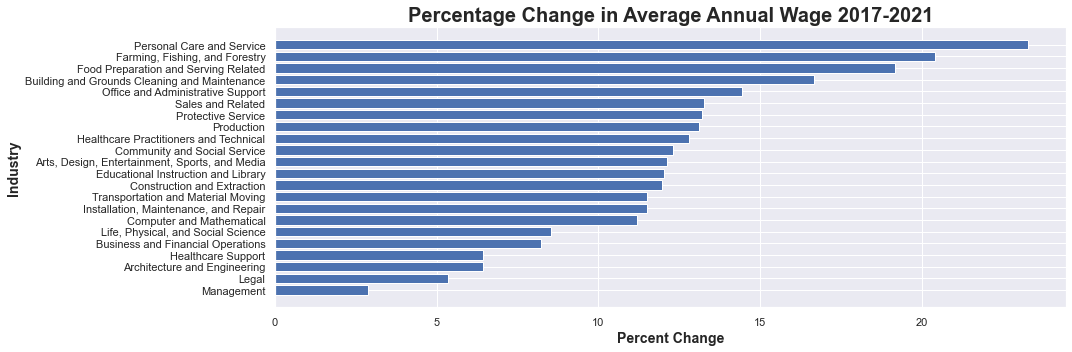

In [114]:
#Make the sort permanent
dfNat2.sort_values(by='Percent Change 2017-2021', inplace=True)

#Drop the All row
dfNat2 = dfNat2.drop(dfNat2[(dfNat2.Industry == 'All')].index)

#Define the size of the figure
plt.rcParams['figure.figsize'] = [15,5]

#Create a horizontal bar graph
plt.barh(dfNat2['Industry'], dfNat2['Percent Change 2017-2021'], 
         color=(dfNat2['Percent Change 2017-2021'] > 0).map({True: 'b', False: 'r'}))
#Set x-axis label
plt.xlabel('Percent Change', fontsize=14, fontweight='bold')
#Set y-axis label
plt.ylabel('Industry', fontsize=14, fontweight='bold')
#Set graph title
plt.title('Percentage Change in Average Annual Wage 2017-2021', fontsize=20, fontweight='bold')
#Create a tight layout so nothing overlaps
plt.tight_layout()

#### We can see that the <i>Personal Care and Service</i> industry has seen the largest growth over the past five years while the <i>Management</i> industry has seen the smallest growth.

#### We can conclude that the annual wage average is growing across all the industries. The cause is unknown, but things like inflation may have something to do with it. We cannot say for certain though.

[(Top)](#toc)

### Could the pandemic have affected the total employment? <a name="Q9"></a>
The COVID-19 pandemic was something we had never experienced in our lifetimes. Two weeks turned into over a year, and the lockdown seemed like it would never lift. A lot of people passed away, and even more lost their jobs. The obvious answer to this question should be yes, but let's take a look at the actual data.

In [115]:
#Make dataframe
dfNat3 = dfNat[['Industry', 'Total Employment 2017','Total Employment 2018',
                'Total Employment 2019','Total Employment 2020',
                'Total Employment 2021',]]

dfNat3.head()

,Industry,Total Employment 2017,Total Employment 2018,Total Employment 2019,Total Employment 2020,Total Employment 2021
0,All,142549250,144733270,146875480,139099570,140886310
1,Management,7280330,7616650,8054120,7947300,8909910
2,Business and Financial Operations,7472750,7721300,8183750,8387490,9053790
3,Computer and Mathematical,4261460,4384300,4552880,4587700,4654750
4,Architecture and Engineering,2516780,2556220,2592680,2515040,2436520


In [116]:
#Calculate change percentage for every year
dfNat3['Percent Change 2017-2018'] = np.round((1 - (dfNat['Total Employment 2018']/dfNat['Total Employment 2017']))*-100, 2)
dfNat3['Percent Change 2018-2019'] = np.round((1 - (dfNat['Total Employment 2019']/dfNat['Total Employment 2018']))*-100, 2)
dfNat3['Percent Change 2019-2020'] = np.round((1 - (dfNat['Total Employment 2020']/dfNat['Total Employment 2019']))*-100, 2)
dfNat3['Percent Change 2020-2021'] = np.round((1 - (dfNat['Total Employment 2021']/dfNat['Total Employment 2020']))*-100, 2)
dfNat3['Percent Change 2017-2021'] = np.round((1 - (dfNat['Total Employment 2021']/dfNat['Total Employment 2017']))*-100, 2)

#### We will conduct an oneway ANOVA test to see if there is change throughout the years.

#### H<sub>0</sub> = The total employment is not changing
#### H<sub>1</sub> = The total employment is changing
#### α = 0.05

In [117]:
#One way ANOVA test to see if employment rate is changing
f_oneway(dfNat3['Percent Change 2017-2018'],
         dfNat3['Percent Change 2018-2019'],
         dfNat3['Percent Change 2019-2020'],
         dfNat3['Percent Change 2020-2021'])

F_onewayResult(statistic=3.5672199030390455, pvalue=0.017286536348291158)

#### The p-value is 0.0172, which is smaller than the significance level of 0.05 we are using. This means we reject the null in favor of the alternative. We can conclude that there is most likely a change in total employment over the five year period.

#### Let's see the data side by side.

In [118]:
#Display years for comparison
dfNat3[['Industry', 'Total Employment 2017',
        'Total Employment 2018', 'Total Employment 2019',
        'Total Employment 2020', 'Total Employment 2021']]

,Industry,Total Employment 2017,Total Employment 2018,Total Employment 2019,Total Employment 2020,Total Employment 2021
0,All,142549250,144733270,146875480,139099570,140886310
1,Management,7280330,7616650,8054120,7947300,8909910
2,Business and Financial Operations,7472750,7721300,8183750,8387490,9053790
3,Computer and Mathematical,4261460,4384300,4552880,4587700,4654750
4,Architecture and Engineering,2516780,2556220,2592680,2515040,2436520
5,"Life, Physical, and Social Science",1148300,1171910,1288920,1296060,1273640
6,Community and Social Service,2096740,2171820,2244310,2231070,2239680
7,Legal,1095770,1127900,1150780,1154740,1178140
8,Educational Instruction and Library,8727710,8779780,8886600,8446910,8191930
9,"Arts, Design, Entertainment, Sports, and Media",1925140,1951170,2017810,1857500,1815290


In [119]:
#Display percent changes for comparison
dfNat3[['Industry', 'Percent Change 2017-2018',
        'Percent Change 2018-2019', 'Percent Change 2019-2020',
        'Percent Change 2020-2021', 'Percent Change 2017-2021']]

,Industry,Percent Change 2017-2018,Percent Change 2018-2019,Percent Change 2019-2020,Percent Change 2020-2021,Percent Change 2017-2021
0,All,1.53,1.48,-5.29,1.28,-1.17
1,Management,4.62,5.74,-1.33,12.11,22.38
2,Business and Financial Operations,3.33,5.99,2.49,7.94,21.16
3,Computer and Mathematical,2.88,3.85,0.76,1.46,9.23
4,Architecture and Engineering,1.57,1.43,-2.99,-3.12,-3.19
5,"Life, Physical, and Social Science",2.06,9.98,0.55,-1.73,10.92
6,Community and Social Service,3.58,3.34,-0.59,0.39,6.82
7,Legal,2.93,2.03,0.34,2.03,7.52
8,Educational Instruction and Library,0.60,1.22,-4.95,-3.02,-6.14
9,"Arts, Design, Entertainment, Sports, and Media",1.35,3.42,-7.94,-2.27,-5.71


#### The numbers show that there was growth in most industries until 2020, which is when most industries declined. Some industries were able to bounce back and grow, but some have continued to decline. It is very probable that the pandemic had some sort of affect on the total employment.

#### Let's see a bar graph of the results.

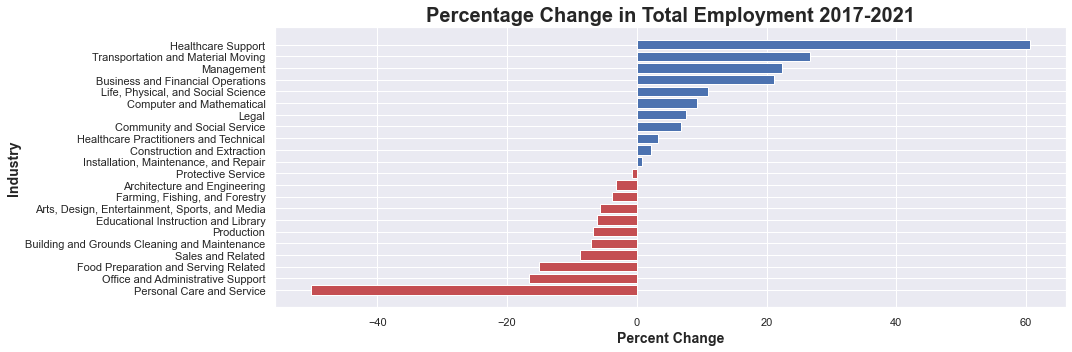

In [120]:
#Make the sort permanent
dfNat3.sort_values(by='Percent Change 2017-2021', inplace=True)

#Drop the All row
dfNat3 = dfNat3.drop(dfNat3[(dfNat3.Industry == 'All')].index)

#Define the size of the figure
plt.rcParams['figure.figsize'] = [15,5]

#Create a horizontal bar graph
plt.barh(dfNat3['Industry'], dfNat3['Percent Change 2017-2021'], 
         color=(dfNat3['Percent Change 2017-2021'] > 0).map({True: 'b', False: 'r'}))
#Set x-axis label
plt.xlabel('Percent Change', fontsize=14, fontweight='bold')
#Set y-axis label
plt.ylabel('Industry', fontsize=14, fontweight='bold')
#Set graph title
plt.title('Percentage Change in Total Employment 2017-2021', fontsize=20, fontweight='bold')
#Create a tight layout so nothing overlaps
plt.tight_layout()

#### <i>Healthcare Support</i> occupations have seen the most growth over this five year period while <i>Personal Care and Service</i> occupations have seen the most decline.

[(Top)](#toc)

# Conclusion <a name="con"></a>

### 1. Which industry has the highest and lowest total employment?
<b>Office and Administrative Support</b> occupations have the highest total employment amount while <b>Farming, Fishing, and Forestry</b> occupations have the lowest total employment amount.
### 2. Which state has the highest and lowest total employment (per industry)?
<b>California</b> has the highest total employment while <b>Wyoming</b> has the lowest total employment. When looking at each industry by itself, California, Florida, New York, and Texas seemed to have consistently high total employment numbers while Wyoming, the Dakotas, and Vermont seemed to have consistently low employment numbers. This may be due to population size since this is not a measure of employment rate. We will answer that next.
### 3. What is the employment rate for each state?
Even though California has the highest total employment, it actually ranks in the bottom 25% in terms of employment rate at 56.2%. The lowest employment rate, however, belongs to <b>West Virginia</b> at <b>51.7%</b>. <b>Nebraska</b> has the highest employment rate at <b>67.6%</b>. The Dakotas are also in the top five with North Dakota at 65.8% and South Dakota at 66.4%. Remember that the Dakotas were consistently low in terms of total employment.
### 4. Which industry has the highest and lowest annual wage average?
<b>Management</b> occupations have the highest annual wage average while <b>Food Preparation and Related Service</b> occupations have the lowest annual wage average.
### 5. Is the employment rate normally distributed?
While it is not an exact match, the employment rate data is pretty close to a normal distribution as seen in the graphs.
### 6. Is the total employment and labor force correlated?
There is a strong positive correlation between total employment and the labor force. This means that as the labor force increases, so does the total employment. Remember that correlation does not imply causation.
### 7. Is the annual wage average and total employment correlated?
There is weak to no correlation between the annual average wage and total employment. This means the two are likely independent from each other.
### 8. Is the wage average changing?
<b>Yes</b>, the annual wage average has been increasing over the past five years. Inflation or companies raising salaries to entice new workers and keep their old ones may play a part in this, but there is not enough data to determine the actual cause.
### 9. Could the pandemic have affected the total employment?
<b>Yes</b>, the pandemic has affected total employment numbers. Most industries saw a decline from 2019 to 2020 and some still continued to decline into 2021 even though most industries were experiencing growth in the previous years (2017, 2018, 2019). Personal Care and Service occupations and Food Preparation and Serving Related occupations saw the biggest decline during this period with a 18.37% decline and 16.54% decline respectively.